In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS,add_constant,qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from statsmodels.api import Logit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector as sfs, RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from scipy.stats import trim_mean
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
#from warnings import filterwarnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,AdaBoostClassifier,GradientBoostingClassifier
#from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay
pd.options.display.max_columns=30

from xgboost import XGBClassifier

In [2]:
df=pd.read_csv(r"C:\Users\praja\OneDrive\CAPSTONE PROJECT\BankCustomerData.csv")

In [3]:
df["pdays"].value_counts(normalize=True)

pdays
-1      0.846221
 370    0.002251
 364    0.001759
 350    0.001689
 175    0.001571
          ...   
 382    0.000023
 440    0.000023
 383    0.000023
 422    0.000023
 218    0.000023
Name: proportion, Length: 418, dtype: float64

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
for i in df.columns:
    if df[i].dtype =='object':
        print('\n',df[i].value_counts())


 job
blue-collar      9536
management       8851
technician       7223
admin.           4810
services         4033
retired          1880
self-employed    1500
entrepreneur     1453
unemployed       1193
housemaid        1178
student           718
unknown           264
Name: count, dtype: int64

 marital
married     25868
single      11806
divorced     4965
Name: count, dtype: int64

 education
secondary    22066
tertiary     12302
primary       6581
unknown       1690
Name: count, dtype: int64

 default
no     41828
yes      811
Name: count, dtype: int64

 housing
yes    24590
no     18049
Name: count, dtype: int64

 loan
no     35554
yes     7085
Name: count, dtype: int64

 contact
cellular     27218
unknown      12776
telephone     2645
Name: count, dtype: int64

 month
may    13532
jul     6587
aug     5987
jun     5128
nov     3895
apr     2718
feb     2296
jan     1224
oct      518
sep      282
mar      258
dec      214
Name: count, dtype: int64

 poutcome
unknown    36085
failur

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


# Univariate Analysis
### Numerical Variables

In [9]:
df_num=df.select_dtypes(np.number)
df_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
42634,21,2488,12,661,2,92,1
42635,87,2190,12,512,2,-1,0
42636,34,6718,13,278,4,97,1
42637,22,254,13,143,2,-1,0


<Axes: xlabel='age', ylabel='Count'>

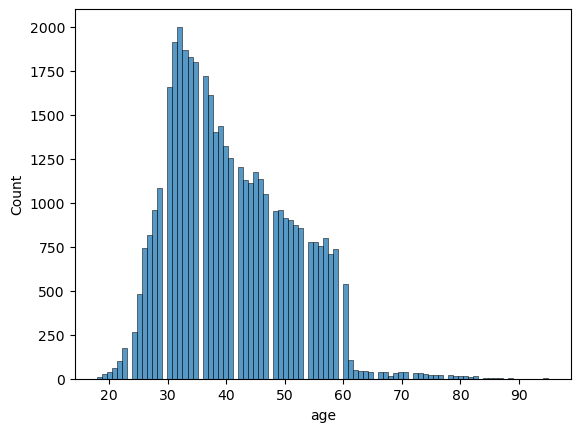

In [10]:
sns.histplot(df['age'])

In [11]:
# Majority of the people are between the age group of 30 and 40. so we can conclude that majority of the customers 
# Bank targeted were fall between this age group.

<Axes: xlabel='balance', ylabel='Count'>

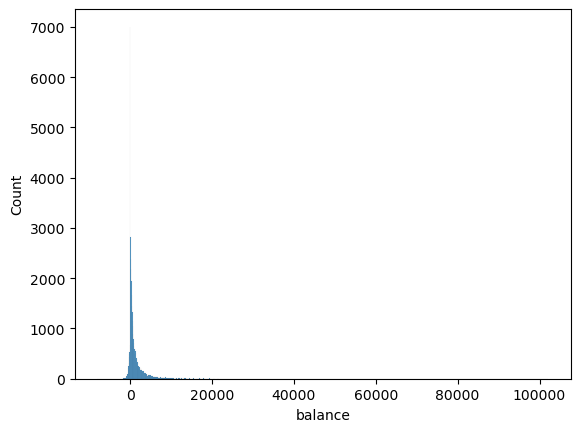

In [12]:
sns.histplot(df['balance'])

In [13]:
# Majority of the peoples income between 0 and 15000. Bank has customers having their balance fallen between this range and 
# they were contacted in the campaigns.

<Axes: xlabel='day', ylabel='Count'>

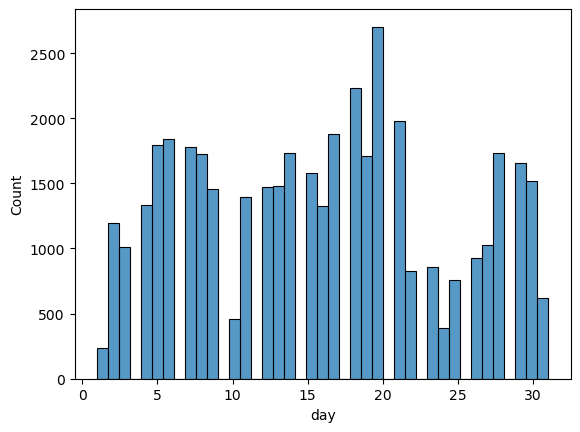

In [14]:
sns.histplot(df['day'])

In [15]:
# Majority of the days bank contacted its client is between 18 and 20 which is the mid of the month.

<Axes: xlabel='duration', ylabel='Count'>

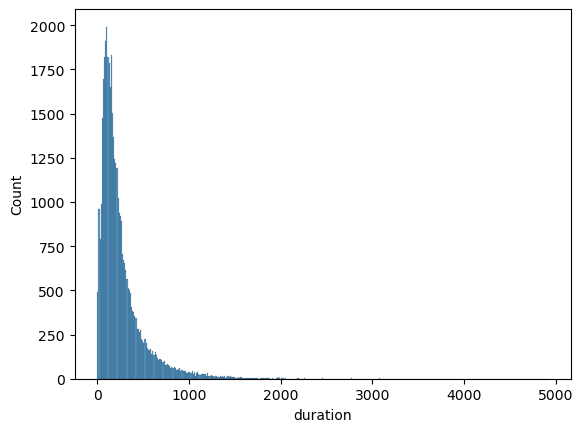

In [16]:
sns.histplot(df['duration'])

In [17]:
# so the max duration bank contacted its customers is between o and 700 sec.More the Duration the bank has spent more will be the customer interested
# in the Term deposit.

<Axes: xlabel='campaign', ylabel='Count'>

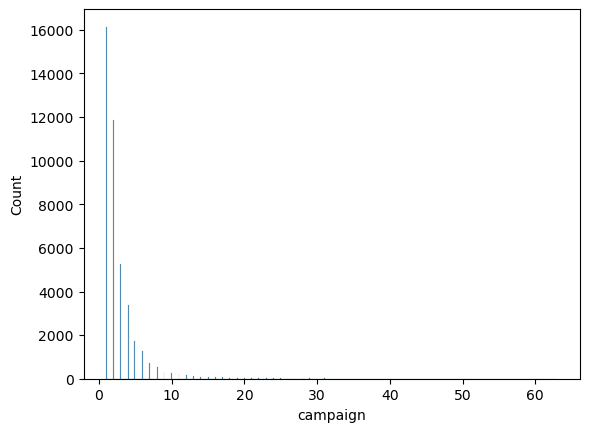

In [18]:
sns.histplot(df['campaign'])

In [19]:
# The Maximum number of times the bank has contacted its client in the current campaign is between 1 and 8 times.
# The more no of times the bank is contacting its client there is a chance of subscribing its Term deposits.
# Clients will be contacted more ,if they are interested and asking for the more information.

<Axes: xlabel='pdays', ylabel='Count'>

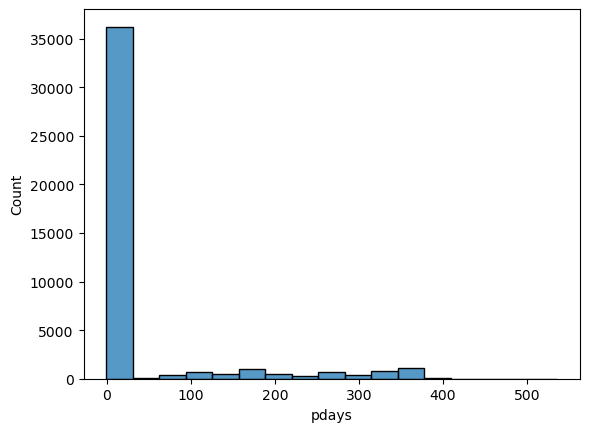

In [20]:
#The Number of Days passed by from the previous campaign contact of the client
sns.histplot(df['pdays'])

In [21]:
df['pdays'].value_counts().head(5)

pdays
-1      36082
 370       96
 364       75
 350       72
 175       67
Name: count, dtype: int64

In [22]:
# Majority of the days passed by from previous campaign is -1 which means they have not contacted in the previous campaign.
# next to -1 was 370 days has passed that a bank has contacted his clients from previous campaign.

<Axes: xlabel='previous', ylabel='Density'>

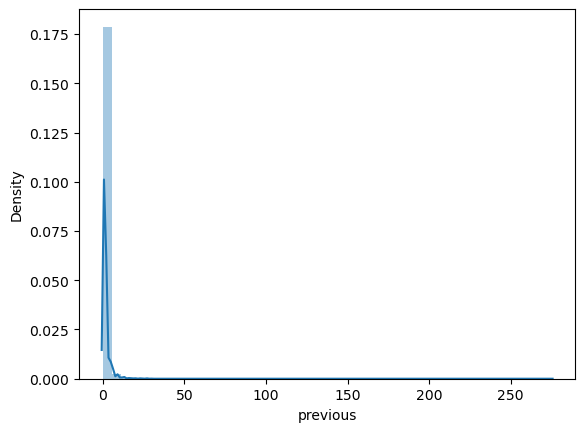

In [23]:
#previous : Number of times the client was contacted for the previous campaign.
sns.distplot(df['previous'])

In [24]:
# The client was contacted maximum 0 to 7 times in the previous campaign. This means More number of times the client was contacted more will be the 
# customer has interest in subscribing the term deposit.

### Categorical variables

In [26]:
df_cat=df.select_dtypes(include='object')
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
42634,student,single,secondary,no,no,no,telephone,jan,success,yes
42635,retired,married,primary,no,no,no,telephone,jan,unknown,yes
42636,blue-collar,married,primary,no,no,no,cellular,jan,other,no
42637,student,single,secondary,no,no,no,cellular,jan,unknown,yes


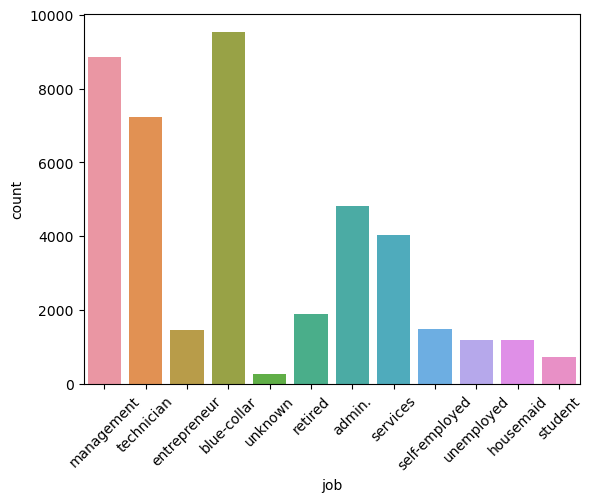

In [27]:
sns.countplot(x=df_cat['job'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [28]:
# Management ,Technician and blue-collar are the majority job holders contacted by the Bank because they were high paying jobs compared to the 
# other job holders and can subscribe to the term deposits.

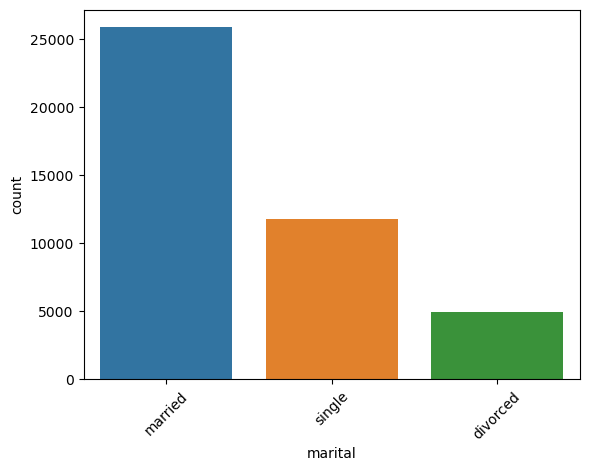

In [29]:
sns.countplot(x=df_cat['marital'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Bank has contacted Married persons assuming that they will subscribe to the term deposits in the names 
#of their family. so they are majority clients.

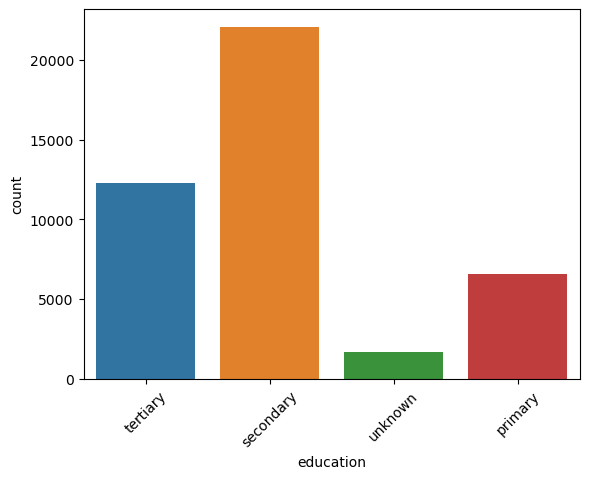

In [31]:
sns.countplot(x=df_cat['education'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [32]:
# Bank has contacted Secondary and Tertiary educational background more bcz assuming they will have jobs and can subscribe to the Term deposits.

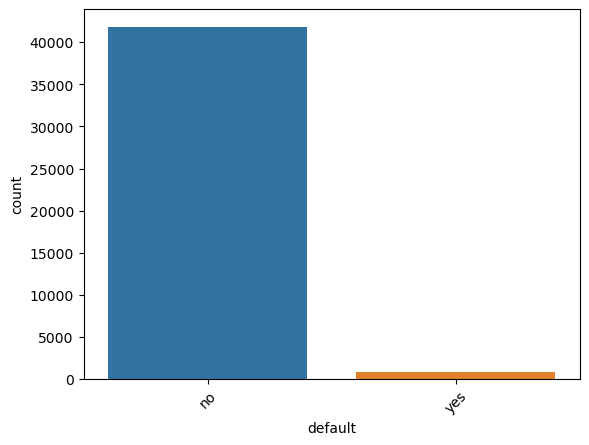

In [33]:
sns.countplot(x=df_cat['default'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [34]:
# Bank contacted only customers who are not the defaulters in repaying the loan amounts.

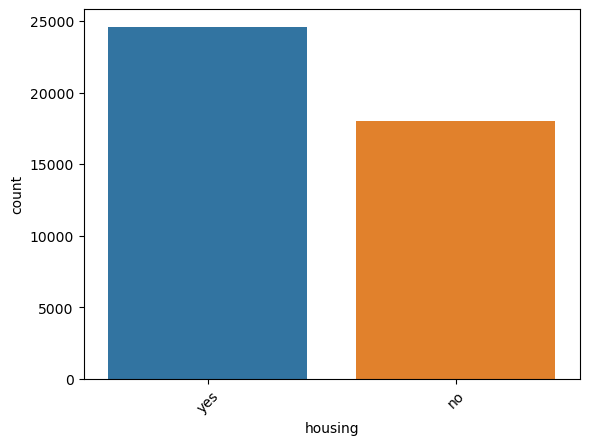

In [35]:
sns.countplot(x=df_cat['housing'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [36]:
# From the above we can conclude that Bank has contacted its customers who are having or taken housing loans from its bank.
# assuming that they can also take their term deposits.

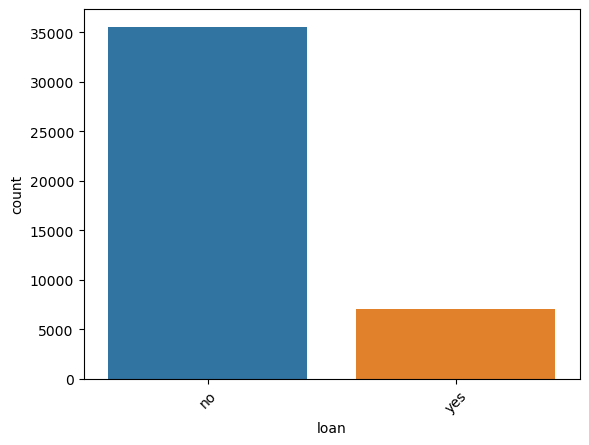

In [37]:
sns.countplot(x=df_cat['loan'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [38]:
# Bank contacted the customers more who are not having the personal loans as it is a 
#highly risk to the Banks because those are collateral free loans.So bank might have decided not to contact them more for subscribing its 
# Term deposit.

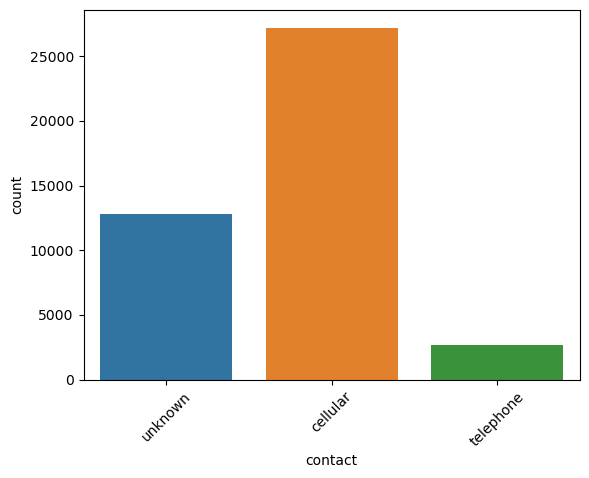

In [39]:
sns.countplot(x=df_cat['contact'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [40]:
# The campaigns done by the Bank to subscribe its term deposits are mode majorly vis the cellular method because this method of contact
# will be easy to contact its costomers from any where and anytime. so bank has preferred cellular method than any other method.

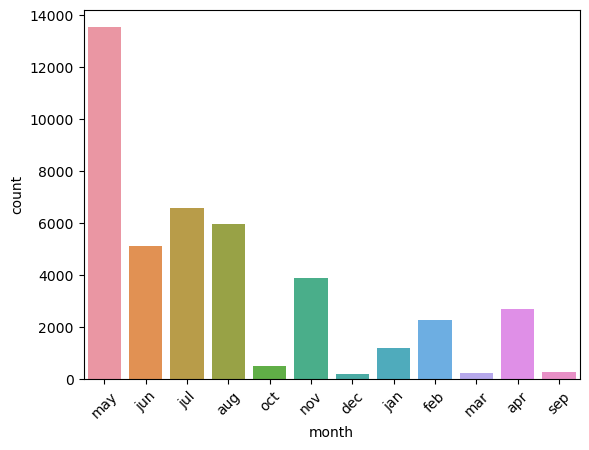

In [41]:
sns.countplot(x=df_cat['month'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [42]:
# Bank has contacted its Clients more  in the months of May,June,July and August assuming that the bank might come up with
# its new customer centric policies to attract the customers.

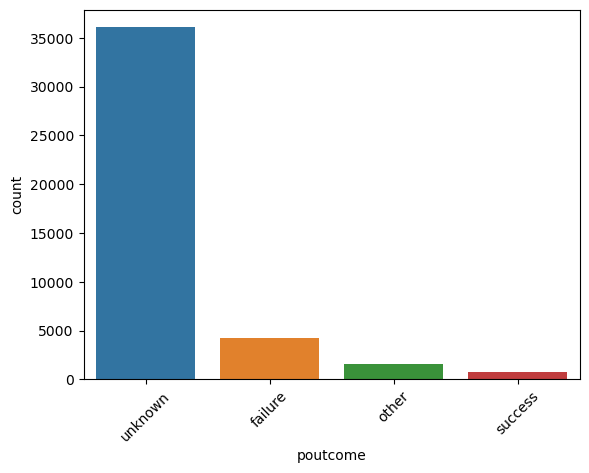

In [43]:
sns.countplot(x=df_cat['poutcome'],data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [44]:
# The Previous campaign outcome was unknown, meaning that these clients were not contacted more in the previous campaign.
# they were the new customers added in the current campaign.

<Axes: ylabel='count'>

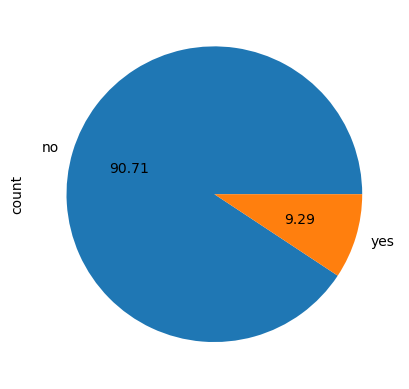

In [45]:
# TargetVariable.
df['term_deposit'].value_counts().plot(kind='pie',autopct='%.2f')

In [46]:
# Majority of the clients were not subscribed.This is because the clients were not more who are not contacted in the 
# previous campaign.(Imbalanced data)

# Bivariate Analysis
### Numerical vs Numerical

<Axes: >

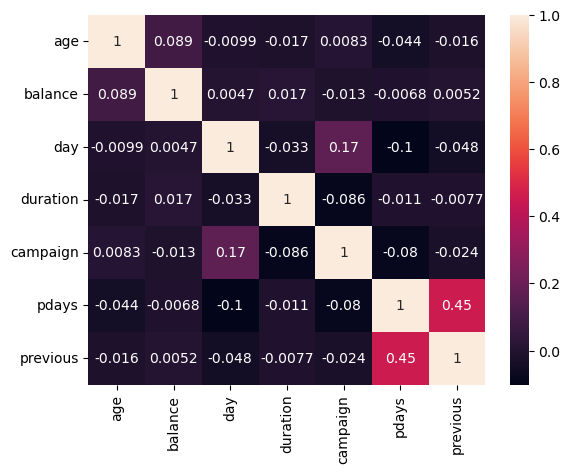

In [48]:
sns.heatmap(df_num.corr(),annot=True)

In [49]:
# There is no Strong Correlation between the Numerical variables. consider strong correlation greater than .65.

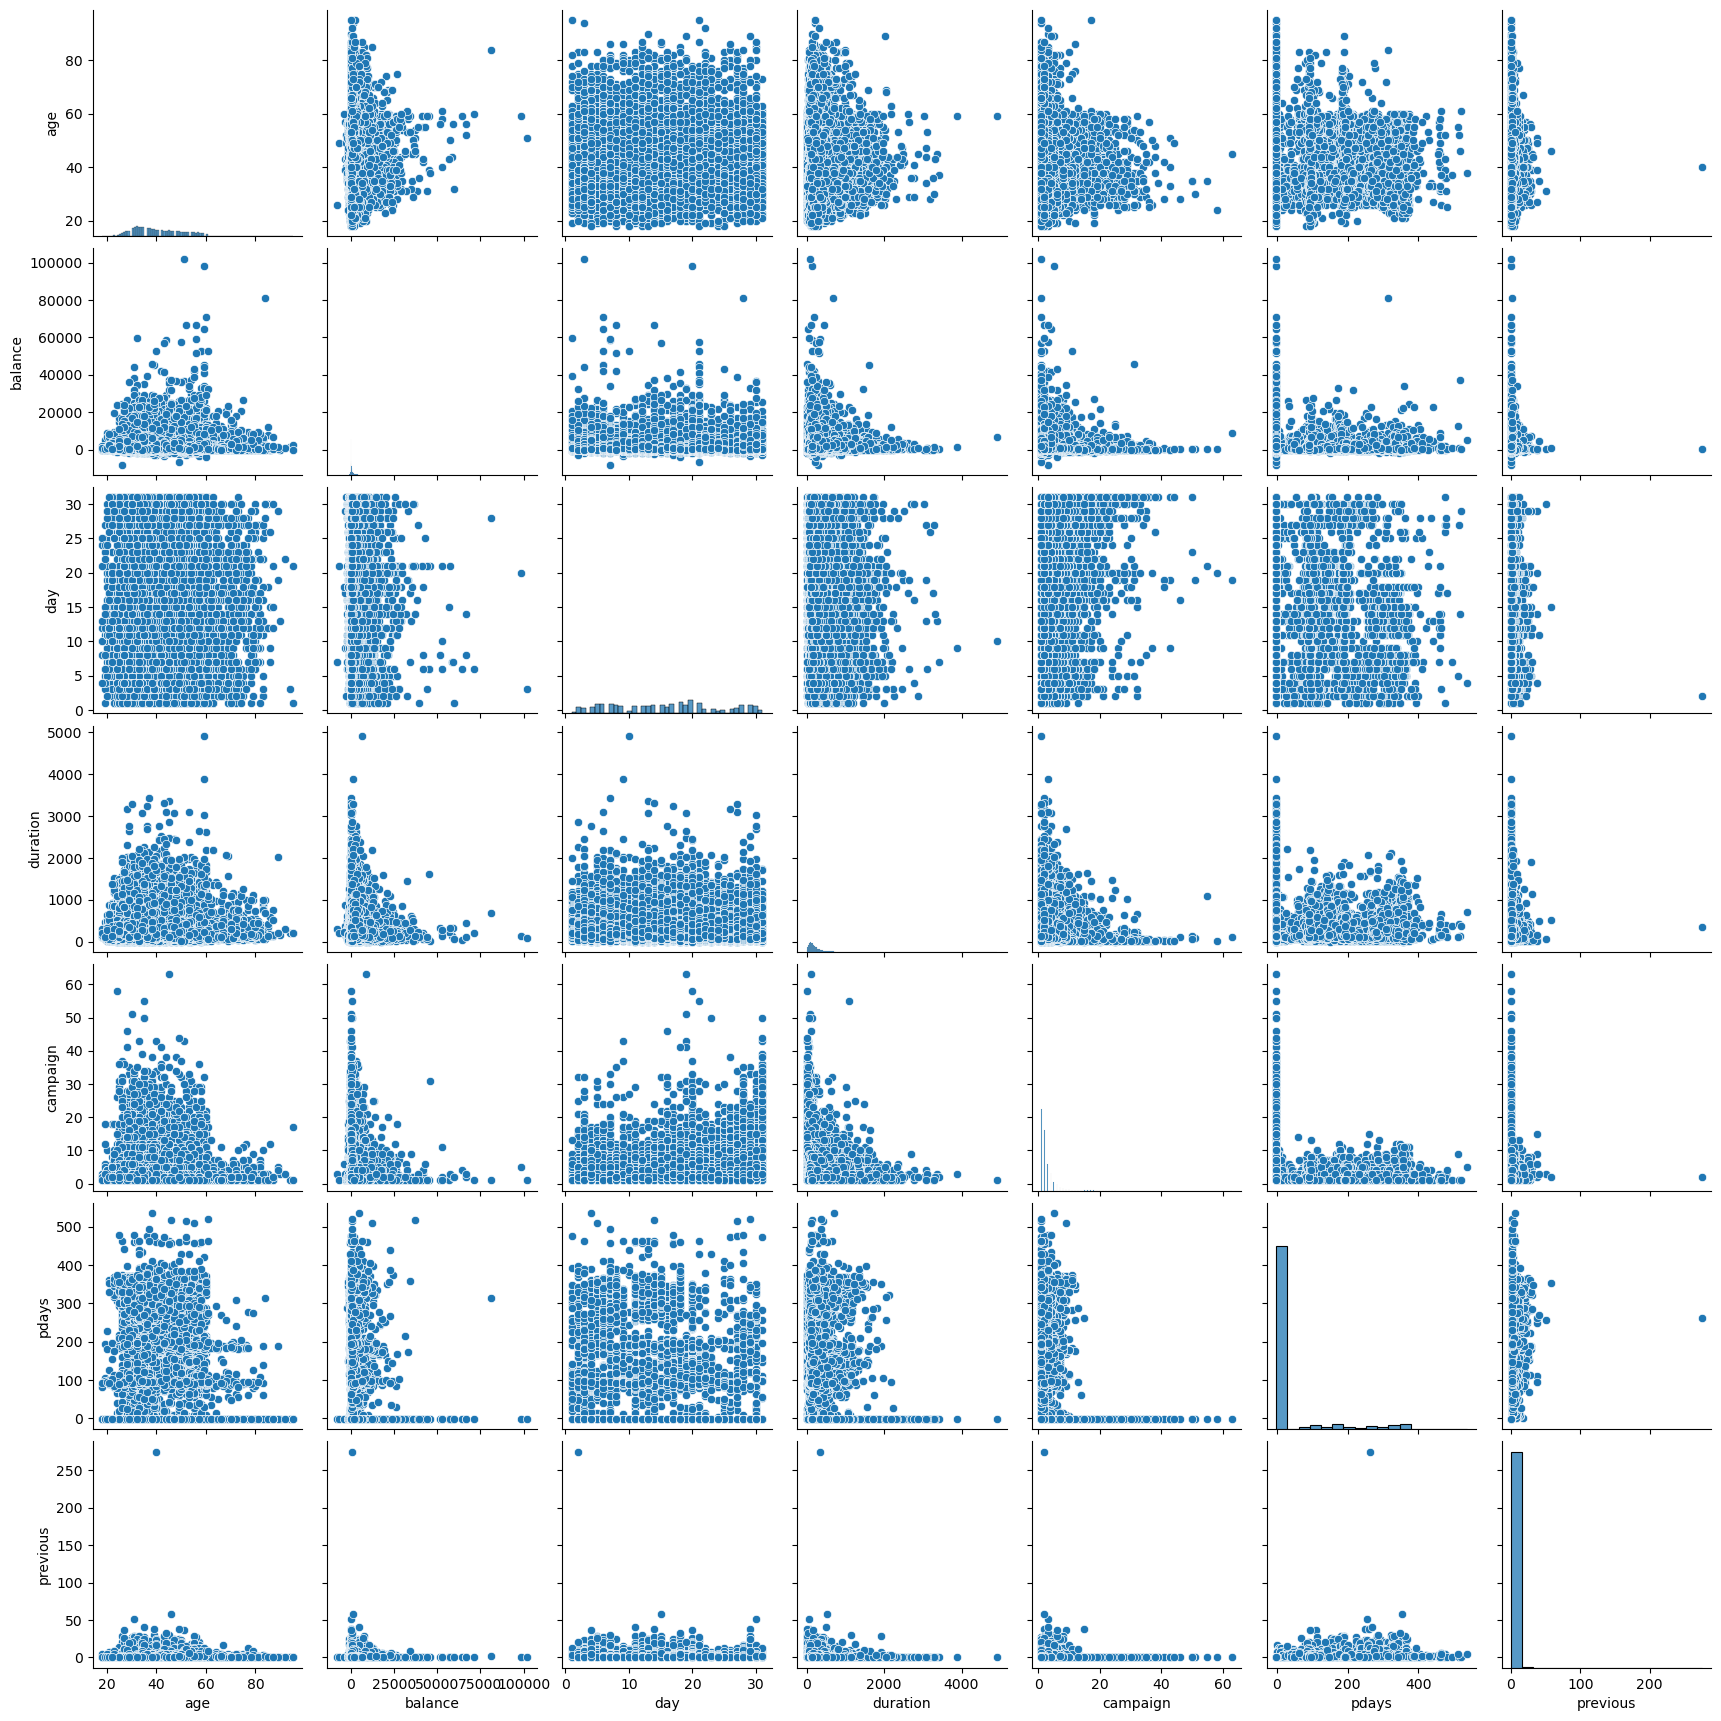

In [50]:
sns.pairplot(df_num)

### Numerical vs Categorical

In [53]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [55]:
df.groupby("term_deposit")["age"].mean()

term_deposit
no     40.759010
yes    41.079778
Name: age, dtype: float64

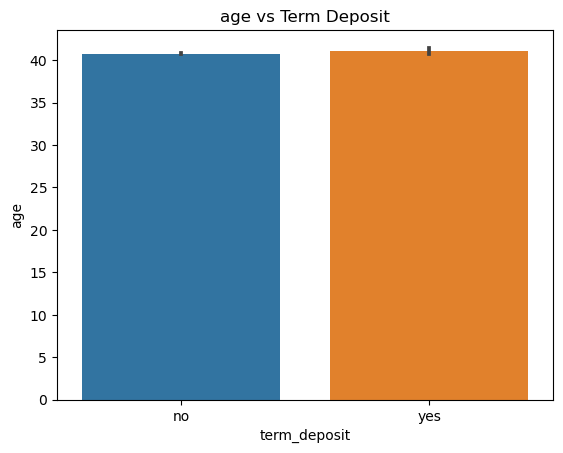

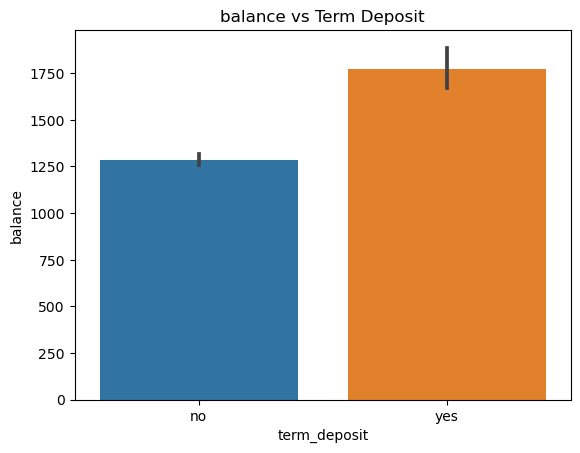

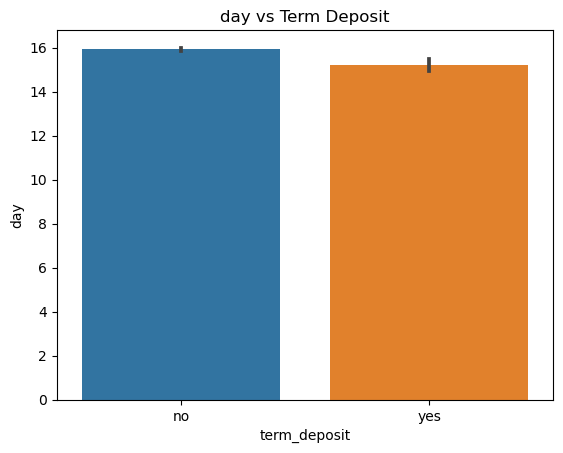

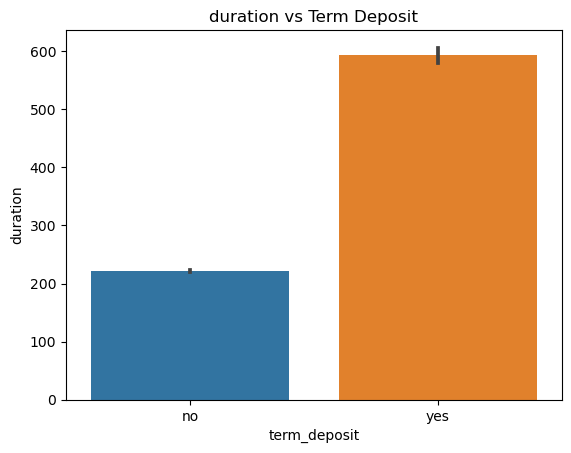

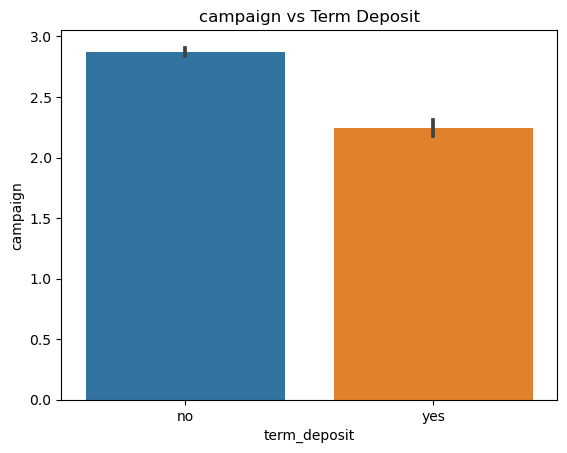

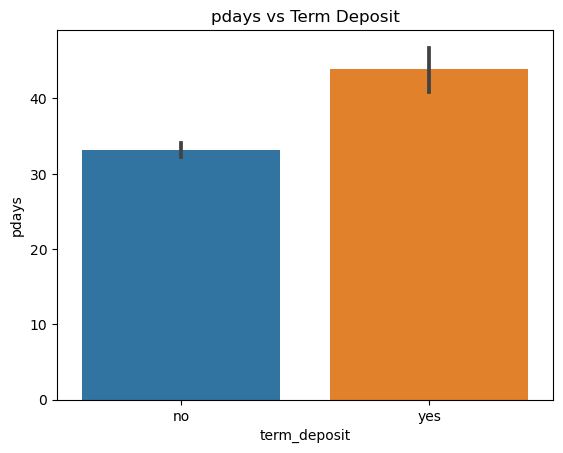

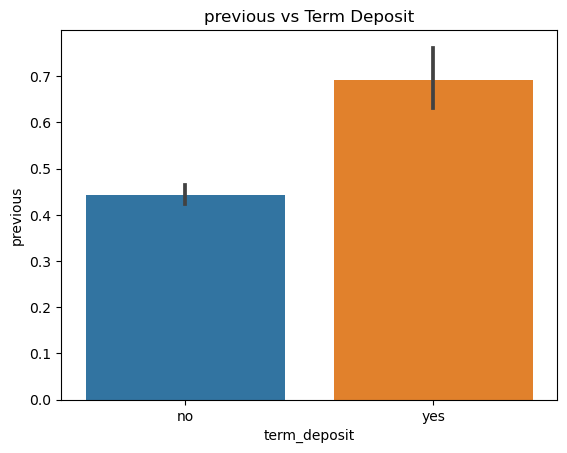

In [56]:
for i in df_num:
    sns.barplot(x='term_deposit', y=i, data=df)
    plt.title(f'{i} vs Term Deposit')
    plt.show()

In [57]:


#The Age of the clients and the term deposit has no association in subscribing to the Term deposit.

# The balance of the Clients in their accounts drives the subscription to the Term deposits.This means high paying job people or 
# above middle class peoples have chances of subscribing to the Term Deposits.

# The day of the month has no association with the term deposits.There is no specific day that the term deposits are sold high or low.

# Duration feature clearly tells that higher the duration time the bank contacted the clients higher the term deposits subscribed. In general if people 
# are spending time to get all the details there is a higher chance to subscribe to the Term deposits.

# Campaign variable tells that there is no association between no of times the client was contacted and subscribing to the Term deposits.

# pdays tells that more the days passed by contacting the customer means higher will be the chance of that customer has subscribed to the Term deposits.

# Previous variable shows that the more the times the client was contacted by the bank in the 
#previous campaign more will be subscribed to the Term deposit.

In [58]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'term_deposit'],
      dtype='object')

### Categorical vs Categorical

<Axes: xlabel='job'>

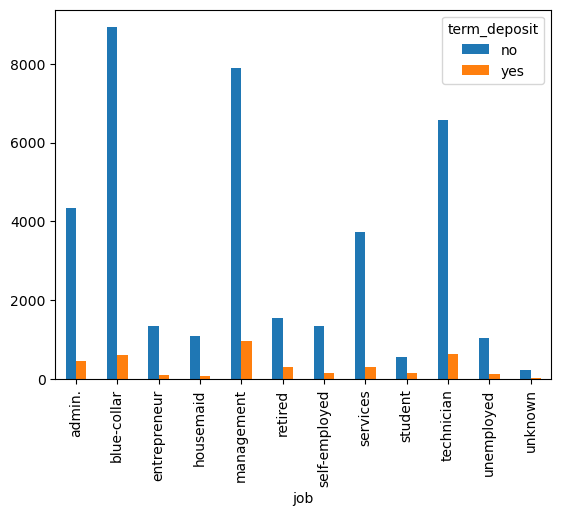

In [60]:
pd.crosstab(df['job'],df['term_deposit']).plot(kind='bar')

In [61]:
# Blue collar job holders were contacted more followed by management and technician compared to other job classes.
# Majority of them do not sebscribed for the Term deposits irrespective of the job.
# Management job holders are the highest term deposit subscribers.

<Axes: xlabel='marital'>

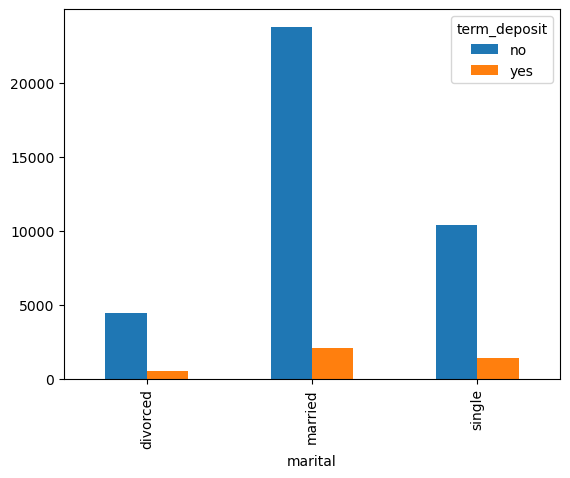

In [62]:
pd.crosstab(df['marital'],df['term_deposit']).plot(kind='bar')

In [63]:
# Bank had attempted to contact married peoples more compared to Single living people and Divorced.
#  Since Married people are more their count in Subscription and not subscription  to Term deposits is more compared to other class of people.
# The rejection of Termdeposits are more compared to the Subscription rate.

<Axes: xlabel='education'>

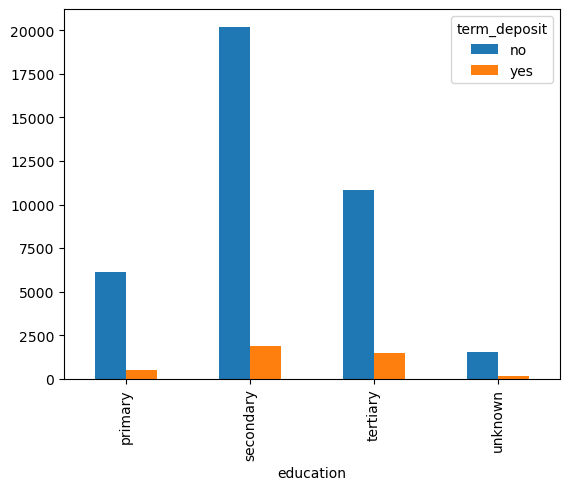

In [64]:
pd.crosstab(df['education'],df['term_deposit']).plot(kind='bar')

In [65]:
#  Secondary educational background are contacted more in the campaigns compared to other educational background.
#  there is no relation between the type of education and the term deposit subscription rate.

In [66]:
df['education'].value_counts()

education
secondary    22066
tertiary     12302
primary       6581
unknown       1690
Name: count, dtype: int64

<Axes: xlabel='default'>

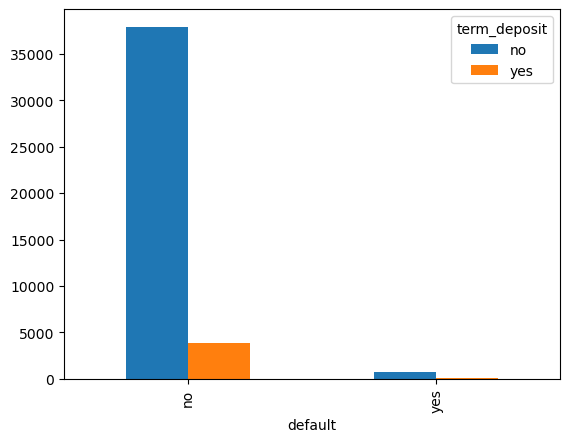

In [67]:
pd.crosstab(df['default'],df['term_deposit']).plot(kind='bar')

In [68]:
# Bank has contacted no defaulters and also some of the defaulters.
# The No defaulters count is more who are not subscribed to the termdeposit.

<Axes: xlabel='housing'>

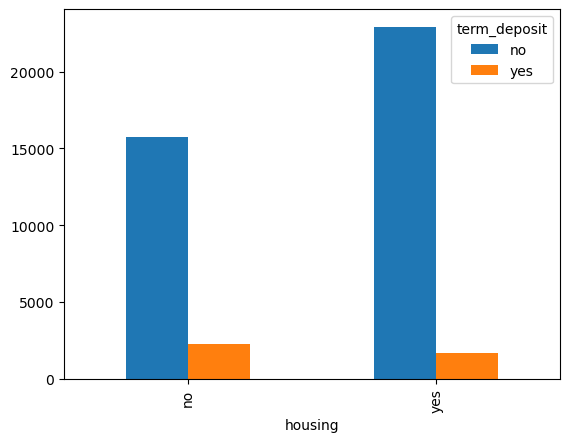

In [69]:
pd.crosstab(df['housing'],df['term_deposit']).plot(kind='bar')

In [70]:
# The people having housing loan are more compared to the other class.
# but the subscription rate is more by the non housing loan people.

<Axes: xlabel='loan'>

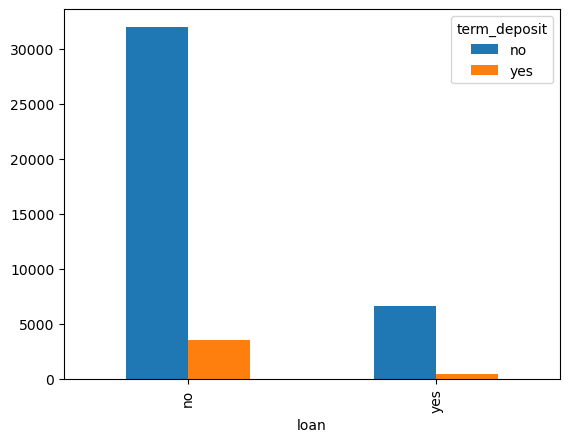

In [71]:
pd.crosstab(df['loan'],df['term_deposit']).plot(kind='bar')

In [72]:
# people not having persoranl loans count is more and have no relation between personal loan and the subscriptio rate.

<Axes: xlabel='contact'>

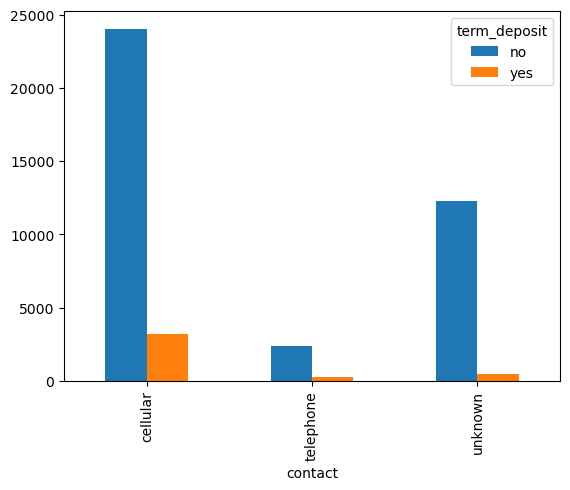

In [73]:
pd.crosstab(df['contact'],df['term_deposit']).plot(kind='bar')

In [74]:
# Bank has preferred contacting clients more via Cellular.
# unknown means the bank has not recorded the data. (need to treat this)


<Axes: xlabel='month'>

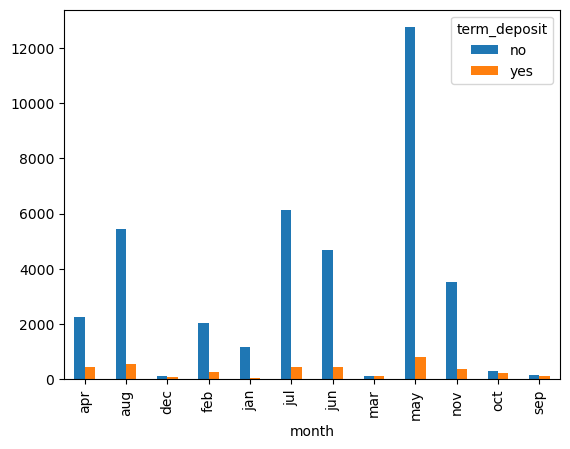

In [75]:
pd.crosstab(df['month'],df['term_deposit']).plot(kind='bar')

In [76]:
# may month count is more. that is the bank has last contacted its clients in this May month.

<Axes: xlabel='poutcome'>

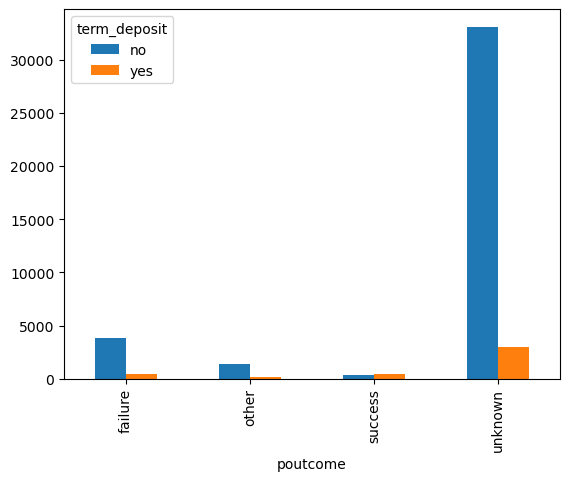

In [77]:
pd.crosstab(df['poutcome'],df['term_deposit']).plot(kind='bar')

In [78]:
# Unknowns are more because these peoples are not contacted previously.
# Success rate is less compared to failure.
# other represents that does not fall into success and failure.

In [79]:
df['term_deposit'].value_counts()

term_deposit
no     38678
yes     3961
Name: count, dtype: int64

In [80]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

# Multivariate analysis

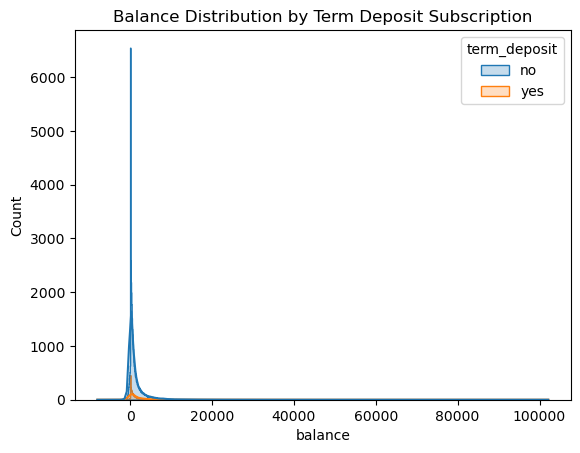

In [82]:
#Previous,pdays,duration,balance
sns.histplot(data=df, x='balance', hue='term_deposit', kde=True, element='step')
plt.title('Balance Distribution by Term Deposit Subscription')
plt.show()

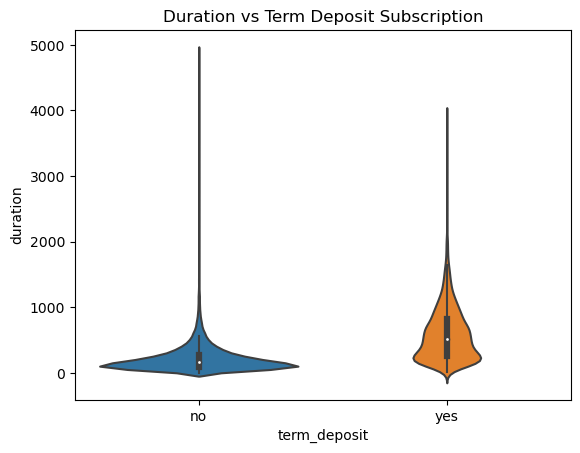

In [83]:
sns.violinplot(x='term_deposit', y='duration', data=df)
plt.title('Duration vs Term Deposit Subscription')
plt.show()

In [84]:
# sns.pairplot(df, vars=['previous', 'pdays', 'duration', 'balance'], hue='term_deposit')
# plt.show()

In [85]:
#Previous,pdays,duration,balance


In [86]:
df_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [87]:
# Minimum age in the data is 18 years and maximum is 95, the average age of the person is 40.The minimum duration is 0 and 
#maximum duration is 4918 and most of the clients were contacted for atleast 3 times.

In [88]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
count,42639,42639,42639,42639,42639,42639,42639,42639,42639,42639
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9536,25868,22066,41828,24590,35554,27218,13532,36085,38678


In [89]:
# Most of the clients were Bluecollerwd and married and contacted during the month of MAY.

# Step-2
### Data Preprocessing

In [91]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [92]:
# No Null Values.

In [93]:
for i in df.columns:
    if 'unknown' in df[i].unique():
        print(i)



job
education
contact
poutcome


In [94]:
df['job'].dtypes

dtype('O')

In [95]:
df.job=df['job'].replace('unknown',df['job'].mode()[0])

In [96]:
df.contact=df['contact'].replace('unknown',df['contact'].mode()[0])

In [97]:
df.education=df['education'].replace('unknown',df['education'].mode()[0])

In [98]:
for i in df.columns:
    if 'unknown' in df[i].unique():
        print(i)

for i in df[['job','education','poutcome','contact']]:
    if df[i].dtype =='object':
        print('\n',df[i].value_counts(normalize=True))

poutcome

 job
blue-collar      0.229837
management       0.207580
technician       0.169399
admin.           0.112808
services         0.094585
retired          0.044091
self-employed    0.035179
entrepreneur     0.034077
unemployed       0.027979
housemaid        0.027627
student          0.016839
Name: proportion, dtype: float64

 education
secondary    0.557143
tertiary     0.288515
primary      0.154342
Name: proportion, dtype: float64

 poutcome
unknown    0.846291
failure    0.100167
other      0.035578
success    0.017965
Name: proportion, dtype: float64

 contact
cellular     0.937968
telephone    0.062032
Name: proportion, dtype: float64


In [99]:
# Unknown are treated.

# Outliers

In [101]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       42639 non-null  int64
 1   balance   42639 non-null  int64
 2   day       42639 non-null  int64
 3   duration  42639 non-null  int64
 4   campaign  42639 non-null  int64
 5   pdays     42639 non-null  int64
 6   previous  42639 non-null  int64
dtypes: int64(7)
memory usage: 2.3 MB


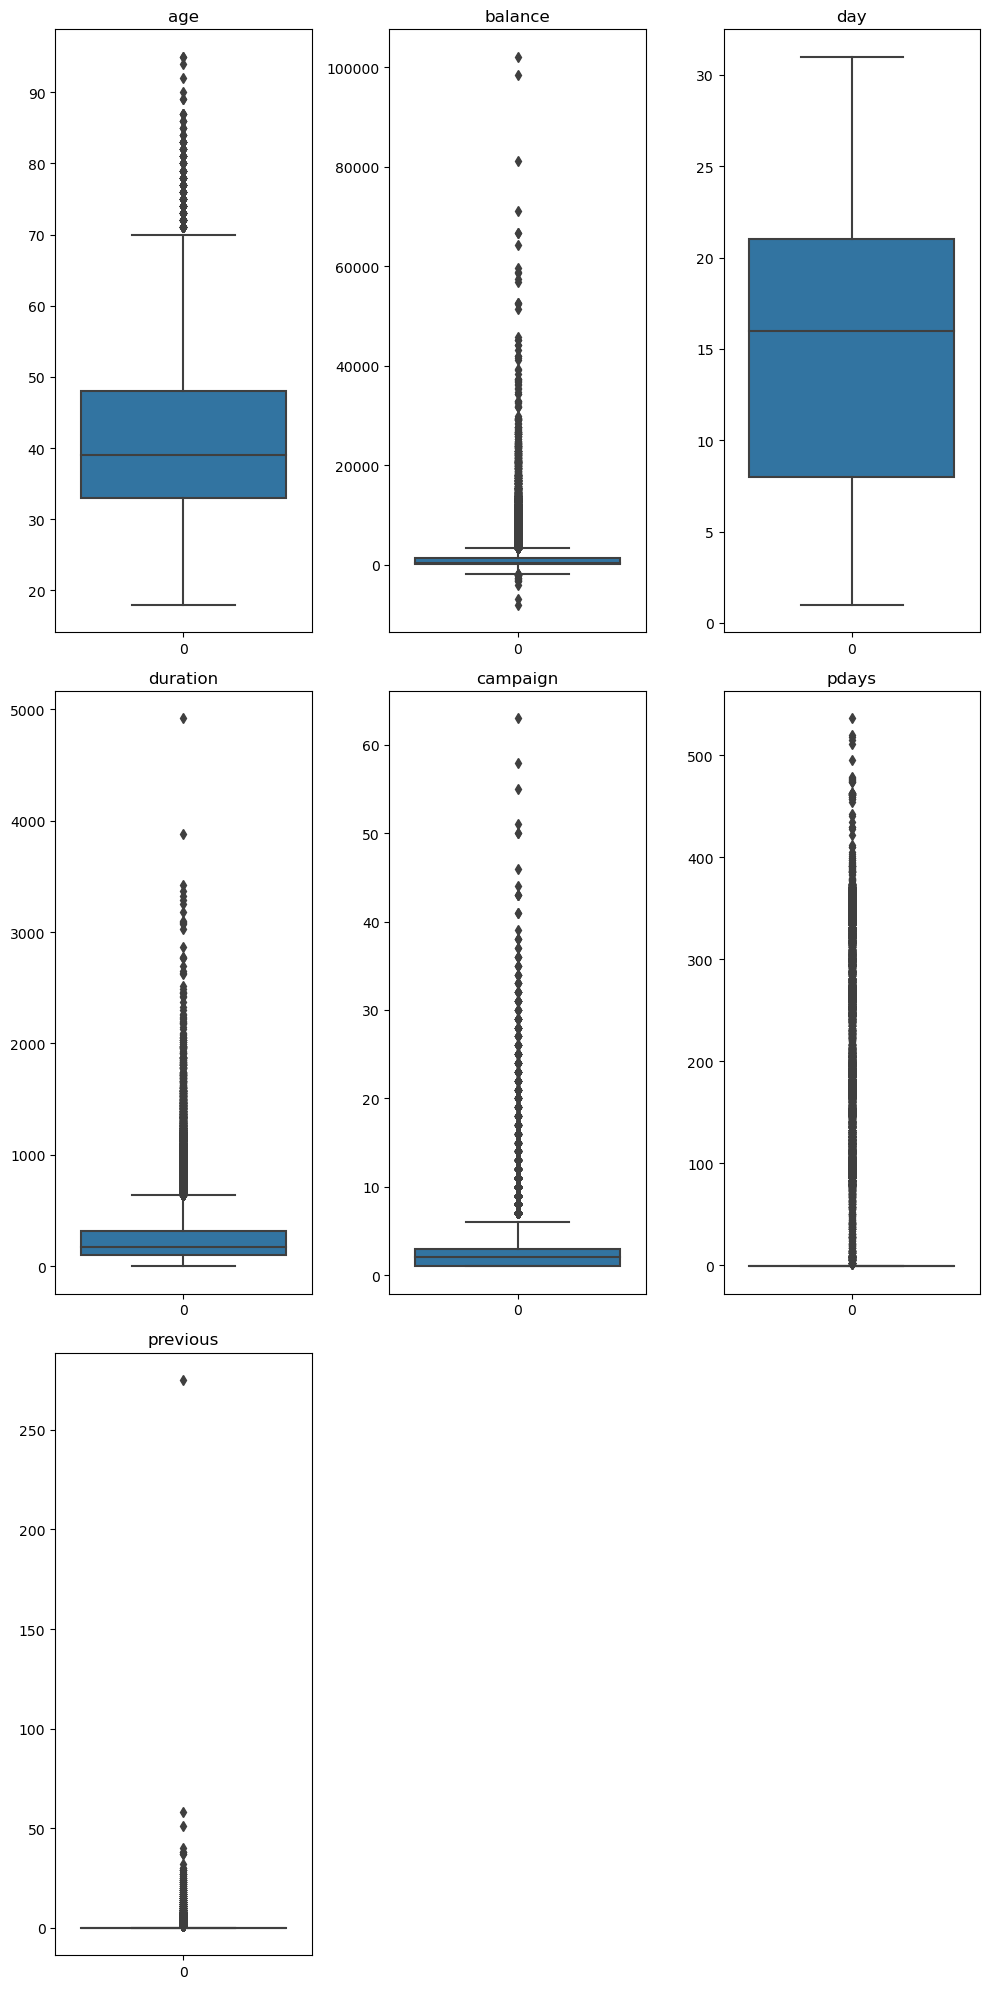

In [102]:
plt.figure(figsize=(10,20))
j=1
for i in df_num:
    plt.subplot(3,3,j)
    j+=1
    sns.boxplot(df_num[i])
    plt.tight_layout()
    plt.title(i)

In [103]:
# q1=df_num['age'].quantile(0.25)
# q3=df_num['age'].quantile(0.75)
# iqr=q3-q1
# ll =q1-1.5*iqr
# ul =q3+1.5*iqr
# df_num_No_outliers=df_num[~((df_num['age']<ll) | (df_num['age']>ul))]

In [104]:
# df_num_No_outliers

In [105]:
# outliers=df_num['age'][(df_num['age']<ll) | (df_num['age']>ul)]

In [106]:
# outliers.value_counts()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


# Statistical test

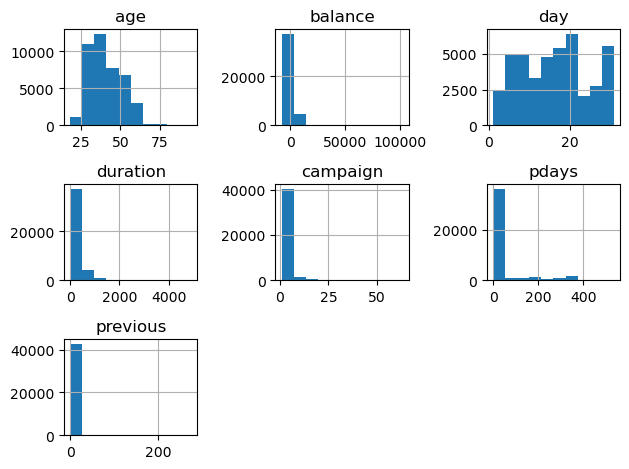

In [109]:
df_num.hist()
plt.tight_layout()
plt.show()

In [110]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, ttest_ind
from sklearn.preprocessing import PowerTransformer
from scipy.stats import levene
from scipy.stats import mannwhitneyu

signi=[]
insigni=[]
for i in df.select_dtypes(include=np.number):
    parametric='yes'
    if shapiro(df[i])[-1]<0.05:
        if df[i].min()<=0:
            pt=PowerTransformer(standardize=False)
            df[i]=pt.fit_transform(df[[i]])
            if shapiro(df[i])[-1]<0.05:
                parametric='no'
        else:
            df[i]=np.log(df[i])
            if shapiro(df[i])[-1]<0.05:
                parametric='no'  
    g1=df[df['term_deposit']=='yes'][i]
    g2=df[df['term_deposit']=='no'][i]
    if levene(g1,g2)[-1]<0.05:
        parmetric='no'
    if parametric=='yes':
        if ttest_ind(g1,g2)[-1] < 0.05:
            print(f'{i} is significant and has a relation with target')
            signi.append(i)
        else:
            print(f'{i} is insignificant and has no relation with target')
            insigni.append(i)
    else:
        if mannwhitneyu(g1,g2)[-1] < 0.05:
            print(f'{i} is significant and has a relation with target')
            signi.append(i)
        else:
            print(f'{i} is insignificant and has no relation with target')
            insigni.append(i)
print('\n')
print('significant variables',signi,len(signi),sep='\n',end='\n\n')
print('insignificant variables',insigni,len(insigni),sep='\n')



age is significant and has a relation with target
balance is significant and has a relation with target
day is significant and has a relation with target
duration is significant and has a relation with target
campaign is significant and has a relation with target
pdays is significant and has a relation with target
previous is significant and has a relation with target


significant variables
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
7

insignificant variables
[]
0


In [111]:
test=ttest_ind(g1,g2)
test

TtestResult(statistic=16.898526975651222, pvalue=7.449822105167513e-64, df=42637.0)

In [112]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,4.060443,management,married,tertiary,no,740.685515,yes,no,cellular,1.609438,may,7.810451,0.0,-2.058955,-0.0,unknown,no
1,3.784190,technician,single,secondary,no,19.474291,yes,no,cellular,1.609438,may,6.807192,0.0,-2.058955,-0.0,unknown,no
2,3.496508,entrepreneur,married,secondary,no,1.803786,yes,yes,cellular,1.609438,may,5.639410,0.0,-2.058955,-0.0,unknown,no


In [113]:
# Day which is in Numerical type we are considering it as Numeric because it has Statistical importance.

# Chi square Test

In [115]:
from scipy.stats import chi2_contingency
signi=[]
insigni=[]
for i in df.drop('term_deposit',axis=1).select_dtypes(include='O'):
    ct=pd.crosstab(df['term_deposit'],df[i])
    if chi2_contingency(ct)[1]<0.05:
        signi.append(i)
    else:
        insigni.append(i)
print('\n')
print('significant variables',signi,len(signi),sep='\n',end='\n\n')
print('insignificant variables',insigni,len(insigni),sep='\n')



significant variables
['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
8

insignificant variables
['contact']
1


In [116]:
# Since Contact is insignificant Variable we are deleting the column.
df_cat.drop(columns=['contact'],axis=1,inplace=True)

In [117]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome', 'term_deposit'],
      dtype='object')

# Encoding

In [119]:
df_cat=df.select_dtypes(include="object")

df_num=df.select_dtypes(np.number)
le=LabelEncoder()
od=OrdinalEncoder()
df_cat["job"]=le.fit_transform(df[["job"]])
df_cat["marital"]=le.fit_transform(df[["marital"]])
df_cat["education"]=od.fit_transform(df[["education"]])
df_cat["default"]=le.fit_transform(df[["default"]])
df_cat["housing"]=le.fit_transform(df[["housing"]])
df_cat["loan"]=le.fit_transform(df[["loan"]])
df_cat["month"]=le.fit_transform(df[["month"]])
df_cat["poutcome"]=le.fit_transform(df[["poutcome"]])
df_cat["term_deposit"]=le.fit_transform(df[["term_deposit"]])


In [120]:
new_df=pd.concat([df_cat,df_num],axis=1)

In [121]:
new_df.drop(columns=(['contact']),axis=1,inplace=True)

In [122]:
new_df

,job,marital,education,default,housing,loan,month,poutcome,term_deposit,age,balance,day,duration,campaign,pdays,previous
0,4,1,2.0,0,1,0,8,3,0,4.060443,740.685515,1.609438,7.810451,0.000000,-2.058955,-0.00000
1,9,2,1.0,0,1,0,8,3,0,3.784190,19.474291,1.609438,6.807192,0.000000,-2.058955,-0.00000
2,2,1,1.0,0,1,1,8,3,0,3.496508,1.803786,1.609438,5.639410,0.000000,-2.058955,-0.00000
3,1,1,1.0,0,1,0,8,3,0,3.850148,550.777764,1.609438,5.954461,0.000000,-2.058955,-0.00000
4,1,2,1.0,0,0,0,8,3,0,3.496508,0.940077,1.609438,7.295772,0.000000,-2.058955,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,8,2,1.0,0,0,0,4,2,1,3.044522,839.585393,2.484907,9.670334,0.693147,1.328329,0.18755
42635,5,1,0.0,0,0,0,4,3,1,4.465908,754.301768,2.484907,9.138705,0.693147,-2.058955,-0.00000
42636,1,1,0.0,0,0,0,4,1,0,3.526361,1932.564073,2.564949,7.930405,1.386294,1.330254,0.18755
42637,8,2,1.0,0,0,0,4,3,1,3.091042,123.197851,2.564949,6.710961,0.693147,-2.058955,-0.00000


In [123]:
df['term_deposit'].value_counts(normalize=True)

term_deposit
no     0.907104
yes    0.092896
Name: proportion, dtype: float64

In [124]:
new_df['term_deposit'].value_counts()

term_deposit
0    38678
1     3961
Name: count, dtype: int64

# Base Model Building

In [126]:
x = new_df.drop('term_deposit', axis=1)  # Features
y = new_df['term_deposit'] 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3,stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (29847, 15)
y_train (29847,)
X_test (12792, 15)
y_test (12792,)


In [128]:
lr=LogisticRegression(solver='liblinear')
model=lr.fit(X_train,y_train)
model

LogisticRegression(solver='liblinear')

In [129]:
model.score(X_train,y_train)

0.9123194960967601

In [130]:
ypred_train=model.predict(X_train)
print(classification_report(y_train,ypred_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     27074
           1       0.58      0.20      0.30      2773

    accuracy                           0.91     29847
   macro avg       0.75      0.59      0.63     29847
weighted avg       0.89      0.91      0.89     29847



In [131]:
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11604
           1       0.61      0.21      0.31      1188

    accuracy                           0.91     12792
   macro avg       0.77      0.60      0.63     12792
weighted avg       0.89      0.91      0.89     12792



In [132]:
#Precision for class 0
# out of total predicted negatives 92 percent are correct
# class 1
# out of total predicted positives 59 percent are correct
# Recall of class 0
# out of total actual negatives 99 percent are correctly predicted
# recall for class 1
# out of total actual positives 18 percent are correctly predicted.

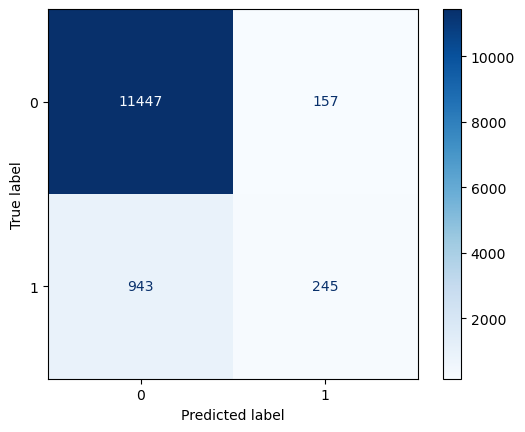

In [133]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,ypred,cmap='Blues')
plt.show()

Text(0, 0.5, 'True positive rate (Sensitivity)')

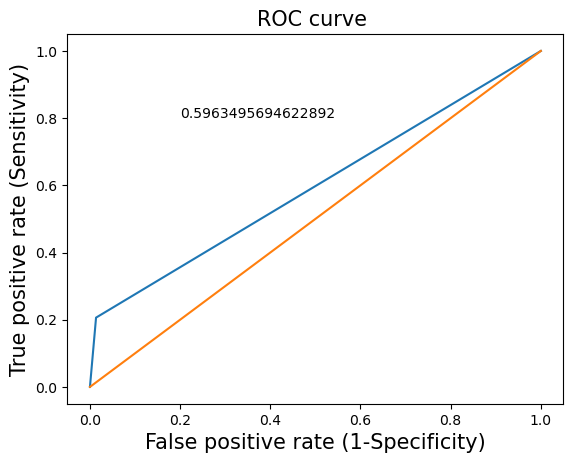

In [134]:
fpr,tpr,threshold=roc_curve(y_test,ypred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,ypred))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# with class_weight.

In [136]:
lr=LogisticRegression(solver='liblinear',class_weight='balanced')
model_w=lr.fit(X_train,y_train)
model_w

LogisticRegression(class_weight='balanced', solver='liblinear')

In [137]:
ypred_b=model_w.predict(X_test)

In [138]:
print(classification_report(y_test,ypred_b))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     11604
           1       0.29      0.81      0.42      1188

    accuracy                           0.80     12792
   macro avg       0.63      0.80      0.65     12792
weighted avg       0.91      0.80      0.83     12792



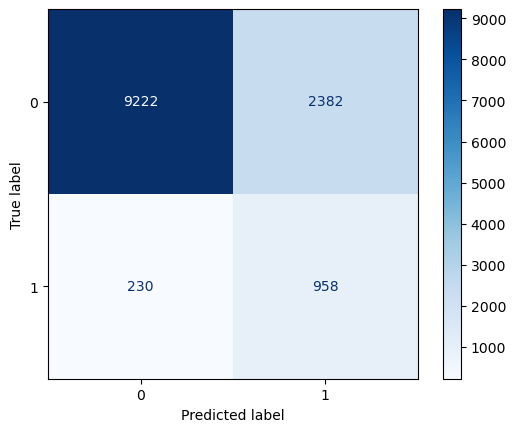

In [139]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,ypred_b,cmap='Blues')
plt.show()

Text(0, 0.5, 'True positive rate (Sensitivity)')

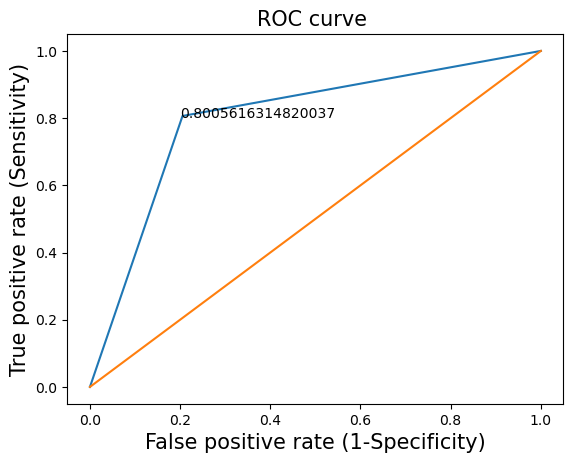

In [140]:
fpr,tpr,threshold=roc_curve(y_test,ypred_b)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,ypred_b))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# Tree Models

Model is: DecisionTreeClassifier()
accuracy_score: 0.8837554721701063
Recall Score 0.398989898989899
F1 Score 0.3893223819301848
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11604
           1       0.38      0.40      0.39      1188

    accuracy                           0.88     12792
   macro avg       0.66      0.67      0.66     12792
weighted avg       0.89      0.88      0.89     12792



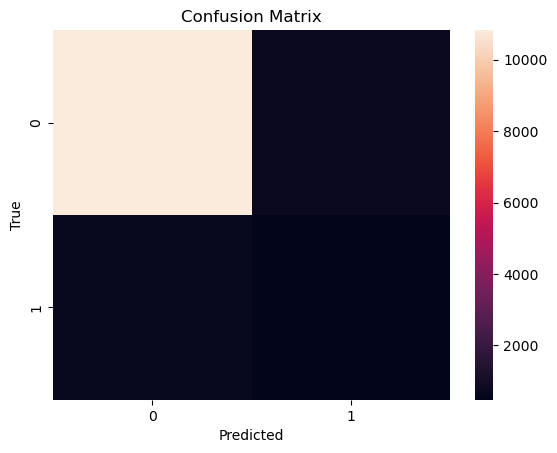

--------------------------------------------------------------------------
Model is: RandomForestClassifier()
accuracy_score: 0.9180737961225766
Recall Score 0.29292929292929293
F1 Score 0.39908256880733944
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11604
           1       0.63      0.29      0.40      1188

    accuracy                           0.92     12792
   macro avg       0.78      0.64      0.68     12792
weighted avg       0.90      0.92      0.90     12792



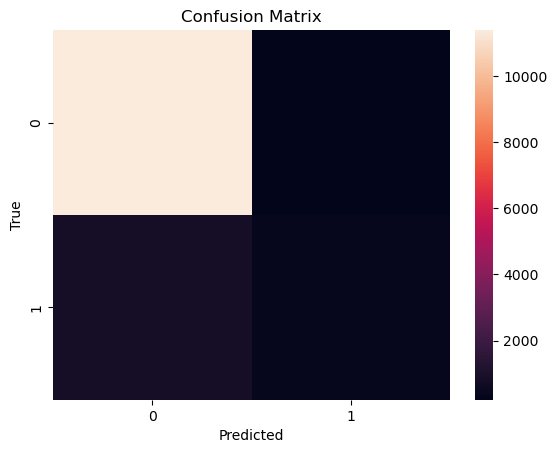

--------------------------------------------------------------------------
Model is: GradientBoostingClassifier()
accuracy_score: 0.9183083176985616
Recall Score 0.31565656565656564
F1 Score 0.4178272980501393
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11604
           1       0.62      0.32      0.42      1188

    accuracy                           0.92     12792
   macro avg       0.78      0.65      0.69     12792
weighted avg       0.90      0.92      0.91     12792



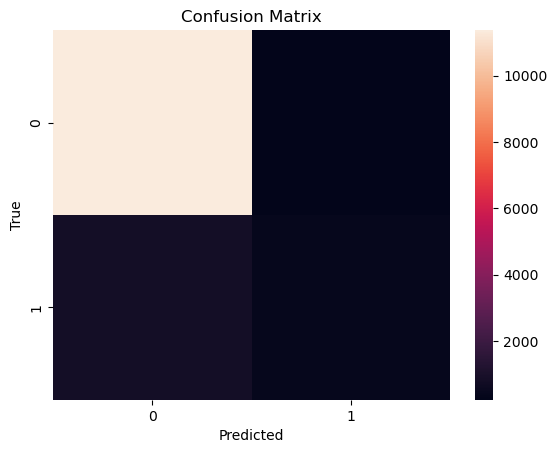

--------------------------------------------------------------------------
Model is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
accuracy_score: 0.9185428392745466
Recall Score 0.39057239057239057
F1 Score 0.47106598984771575
              precision    recall  f1-score   support

           0       0.9

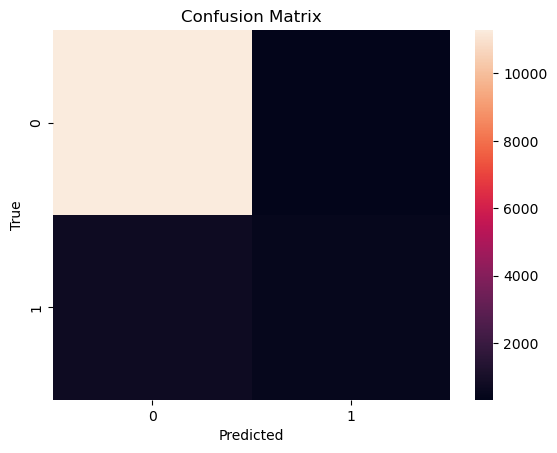

--------------------------------------------------------------------------


In [142]:
from sklearn.metrics import r2_score,recall_score,f1_score
import xgboost as xgb
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBClassifier()


Models = [tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    #y_pred = model.predict(X_test)
    #y_pred_sm=model.predict(xtest)
    ypred=model.predict(X_test)
   # print(clf._class.name_)
    from sklearn.metrics import accuracy_score
    #y_pred_sm = model.predict(xtest)
    print('accuracy_score:', accuracy_score(y_test,ypred))
    #print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test,ypred))
    print('F1 Score', f1_score(y_test,ypred))
    print(classification_report(y_test,ypred))
    sns.heatmap(confusion_matrix(y_test,ypred))
    , annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print('--------------------------------------------------------------------------')

# with weight_class

Model is: DecisionTreeClassifier(class_weight='balanced', random_state=10)
accuracy_score: 0.8864915572232646
Recall Score 0.35353535353535354
F1 Score 0.36649214659685864
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11604
           1       0.38      0.35      0.37      1188

    accuracy                           0.89     12792
   macro avg       0.66      0.65      0.65     12792
weighted avg       0.88      0.89      0.88     12792



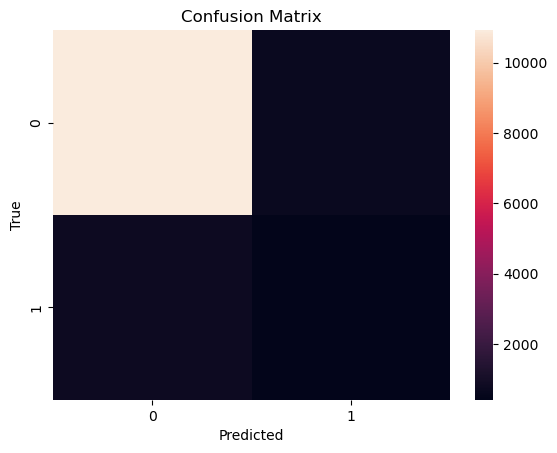

--------------------------------------------------------------------------
Model is: RandomForestClassifier(class_weight='balanced', random_state=10)
accuracy_score: 0.9136178861788617
Recall Score 0.1994949494949495
F1 Score 0.30018999366687776
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11604
           1       0.61      0.20      0.30      1188

    accuracy                           0.91     12792
   macro avg       0.76      0.59      0.63     12792
weighted avg       0.89      0.91      0.89     12792



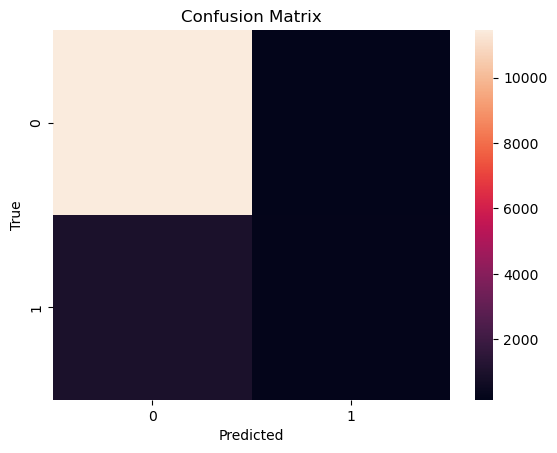

--------------------------------------------------------------------------
Model is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=10,
              reg_alpha=None, reg_lambda=None, ...)
accuracy_score: 0.8864915572232646
Recall Score 0.7474747474747475
F1 Score 0.550185873605948
              precision    recall  f1-score   support

           0       0.97    

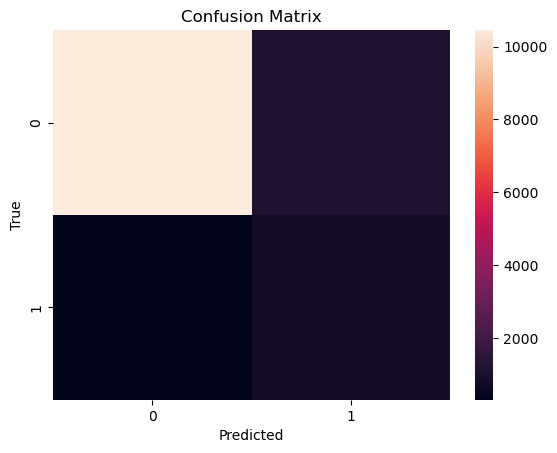

--------------------------------------------------------------------------


In [144]:
from sklearn.metrics import r2_score,recall_score,f1_score
import xgboost as xgb
tree = DecisionTreeClassifier(class_weight='balanced',random_state=10)
rf = RandomForestClassifier(class_weight='balanced',random_state=10)
xgb = xgb.XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),random_state=10)


Models = [tree,rf,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    #y_pred = model.predict(X_test)
    #y_pred_sm=model.predict(xtest)
    ypred=model.predict(X_test)
   # print(clf._class.name_)
    from sklearn.metrics import accuracy_score
    #y_pred_sm = model.predict(xtest)
    print('accuracy_score:', accuracy_score(y_test,ypred))
    #print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test,ypred))
    print('F1 Score', f1_score(y_test,ypred))
    print(classification_report(y_test,ypred))
    sns.heatmap(confusion_matrix(y_test,ypred))
    , annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print('--------------------------------------------------------------------------')

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.98      0.84      0.91     11604
           1       0.36      0.85      0.50      1188

    accuracy                           0.84     12792
   macro avg       0.67      0.84      0.70     12792
weighted avg       0.92      0.84      0.87     12792



In [146]:
# Knn model
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn=KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_predict=knn_model.predict(X_test)
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11604
           1       0.40      0.06      0.10      1188

    accuracy                           0.90     12792
   macro avg       0.66      0.52      0.52     12792
weighted avg       0.86      0.90      0.87     12792



# The Logistic model, XGB model and Gradientboost models are best models having highest recall value.

# Features Selection By Voting Method

In [149]:
xgb_importance = pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)
xgb_importance

housing      0.211334
duration     0.155881
month        0.114741
poutcome     0.072746
pdays        0.066540
loan         0.058863
day          0.051251
education    0.050995
age          0.041606
campaign     0.037457
balance      0.030702
previous     0.030095
job          0.026535
default      0.026316
marital      0.024937
dtype: float32

In [150]:
gb_importance = pd.Series(gb_model.feature_importances_,index=x.columns).sort_values(ascending=False)
gb_importance

duration     0.598124
month        0.134600
housing      0.076864
pdays        0.051525
age          0.044461
day          0.027616
poutcome     0.021040
balance      0.014754
campaign     0.010913
education    0.009405
loan         0.003826
job          0.003464
marital      0.002777
previous     0.000632
default      0.000000
dtype: float64

In [151]:
coefficients = model_w.coef_.flatten()
coefficients

array([ 4.34373711e-03,  8.72495196e-02,  3.31837425e-01, -1.57537161e-01,
       -1.10434783e+00, -5.58296451e-01, -1.74483828e-02,  9.62842860e-01,
       -2.03770144e-01,  1.82488222e-04, -1.24433796e-01,  1.00386889e+00,
       -4.60351553e-01,  1.00189027e+00, -7.76451490e-01])

In [153]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs(coefficients) }).sort_values(by='Abs_Coefficient',ascending=False)

importance_df

,Feature,Coefficient,Abs_Coefficient
4,housing,-1.104348,1.104348
11,duration,1.003869,1.003869
13,pdays,1.001890,1.001890
7,poutcome,0.962843,0.962843
14,previous,-0.776451,0.776451
5,loan,-0.558296,0.558296
12,campaign,-0.460352,0.460352
2,education,0.331837,0.331837
8,age,-0.203770,0.203770
3,default,-0.157537,0.157537


In [155]:
imp_features=['housing','duration','month','pdays','poutcome','loan','age','education']

In [157]:
xtrain_imp=X_train[imp_features]
xtest_imp=X_test[imp_features]

# building model on imp features

In [163]:
lr=LogisticRegression(class_weight='balanced')
model_lr=lr.fit(xtrain_imp,y_train)
ypred_imp=model_lr.predict(xtest_imp)
print(classification_report(y_test,ypred_imp))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88     11604
           1       0.29      0.80      0.42      1188

    accuracy                           0.80     12792
   macro avg       0.63      0.80      0.65     12792
weighted avg       0.91      0.80      0.83     12792



In [168]:
# Gradientboosting model

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

gb_model_imp = GradientBoostingClassifier(random_state=42)
gb_model_imp.fit(xtrain_imp,y_train, sample_weight=sample_weights)

y_pred_gb_imp = gb_model_imp.predict(xtest_imp)
print(classification_report(y_test, y_pred_gb_imp))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     11604
           1       0.35      0.85      0.50      1188

    accuracy                           0.84     12792
   macro avg       0.67      0.84      0.70     12792
weighted avg       0.92      0.84      0.87     12792



In [170]:
# XGmodel


In [180]:
xgb_imp = XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),random_state=10)
xgb_imp.fit(xtrain_imp,y_train)
y_pred_xg_imp = xgb_imp.predict(xtest_imp)
print(classification_report(y_test, y_pred_xg_imp))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     11604
           1       0.37      0.75      0.50      1188

    accuracy                           0.86     12792
   macro avg       0.67      0.81      0.71     12792
weighted avg       0.92      0.86      0.88     12792



# Building model using Hyperparameter tuning on selected Features

In [186]:
log_reg = LogisticRegression(class_weight='balanced')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'],  
    'max_iter': [100, 200, 500]  
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(xtrain_imp,y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest_imp)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.79      0.88     11604
           1       0.28      0.80      0.42      1188

    accuracy                           0.80     12792
   macro avg       0.63      0.80      0.65     12792
weighted avg       0.91      0.80      0.83     12792



### Gradient Boosting

In [193]:
true_parameters=[{'n_estimators': [100, 120],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015],
    'max_depth' : [2, 3, 4, 5, 6]}]
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
gbm=GradientBoostingClassifier(random_state=10)
gbm_grid=GridSearchCV(estimator=gbm,param_grid=true_parameters,cv=5)
gbm_grid.fit(xtrain_imp,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120]}])

In [195]:

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

gradient_model=GradientBoostingClassifier(n_estimators = gbm_grid.best_params_.get('n_estimators'),
                                          learning_rate = gbm_grid.best_params_.get('learning_rate'),
                                          max_depth = gbm_grid.best_params_.get('max_depth'),
                                         random_state=10)
gradient_model.fit(xtrain_imp,y_train, sample_weight=sample_weights)

y_pred_gb_hp = gradient_model.predict(xtest_imp)
print(classification_report(y_test, y_pred_gb_hp))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     11604
           1       0.36      0.84      0.50      1188

    accuracy                           0.84     12792
   macro avg       0.67      0.84      0.70     12792
weighted avg       0.92      0.84      0.87     12792



In [197]:
# XG Model

In [199]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

In [201]:
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(xtrain_imp,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0, 1, 2, 3, 4],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(3, 10)},
             scoring='roc_auc')

In [207]:
xgb_predict=xgb_model.predict(xtest_imp)
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11604
           1       0.36      0.84      0.50      1188

    accuracy                           0.84     12792
   macro avg       0.67      0.84      0.70     12792
weighted avg       0.92      0.84      0.87     12792



In [140]:
sm=SMOTE(sampling_strategy=0.7)
xtrain_sm,ytrain_sm=sm.fit_resample(X_train,y_train)

In [141]:
ytrain_sm.value_counts(normalize=True)

term_deposit
0    0.588246
1    0.411754
Name: proportion, dtype: float64

In [142]:
log_reg=LogisticRegression(random_state=10)
log_reg.fit(xtrain_sm,ytrain_sm)

LogisticRegression(random_state=10)

In [286]:
y_pred_sm=log_reg.predict(X_test)
pd.DataFrame(y_pred_sm).value_counts()

0    10551
1     2241
Name: count, dtype: int64

In [144]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     11604
           1       0.32      0.61      0.42      1188

    accuracy                           0.84     12792
   macro avg       0.64      0.74      0.66     12792
weighted avg       0.90      0.84      0.86     12792



In [145]:
# y_predsm_train=log_reg.predict(X_train)
# print(classification_report(y_train, y_predsm_train))

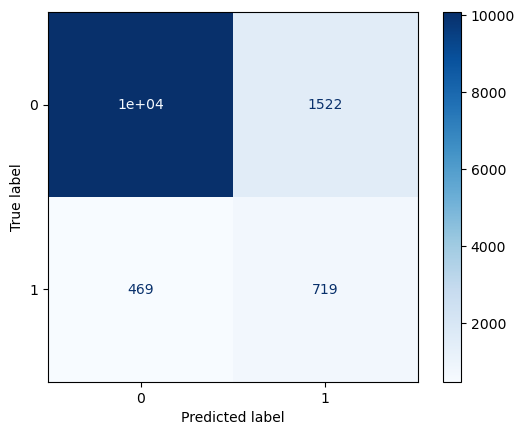

In [146]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sm,cmap='Blues')
plt.show()

In [147]:
#Precision for class 0
# out of total predicted negatives 96 percent are correct
# class 1
# out of total predicted positives 32 percent are correct
# Recall of class 0
# out of total actual negatives 87 percent are correctly predicted
# recall for class 1
# out of total actual positives 60 percent are correctly predicted.

Text(0, 0.5, 'True positive rate (Sensitivity)')

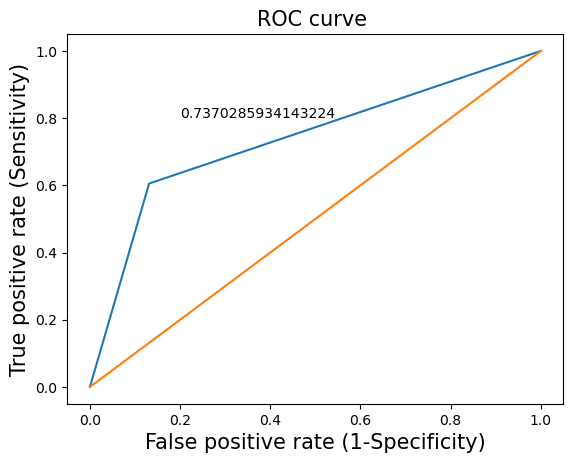

In [148]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_sm)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,y_pred_sm))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

In [150]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr=LogisticRegression()
s=sfs(estimator=lr,k_features='best')
s.fit(xtrain_sm,ytrain_sm)
selected_features=list(s.k_feature_names_)


In [151]:
selected_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contacted_previously',
 'age',
 'duration',
 'campaign',
 'previous']

In [308]:

xtrain=xtrain_sm[selected_features]
xtest=X_test[selected_features]

In [310]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain_sm)
ypred=model.predict(xtest)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11604
           1       0.35      0.60      0.44      1188

    accuracy                           0.86     12792
   macro avg       0.65      0.74      0.68     12792
weighted avg       0.90      0.86      0.87     12792



In [155]:
#Precision for class 0
# out of total predicted negatives 96 percent are correct
# class 1
# out of total predicted positives 35 percent are correct
# Recall of class 0
# out of total actual negatives 88 percent are correctly predicted
# recall for class 1
# out of total actual positives 60 percent are correctly predicted.
# Accuracy Score increased to 86 with doing Feature Selection.

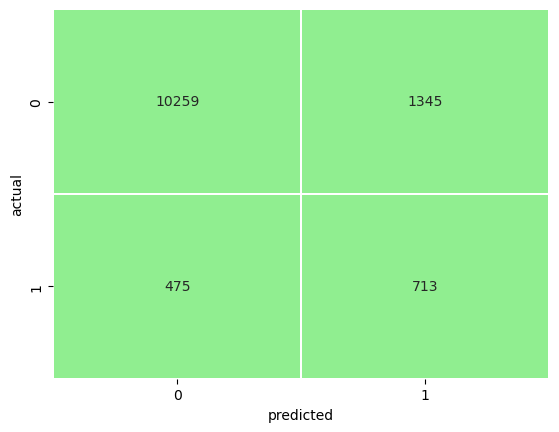

In [320]:
cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm,cmap=ListedColormap(['lightgreen']),annot=True,fmt='d',cbar=False,linewidths=0.1)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [322]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [328]:
accuracy=(TP+TN)/(TN+TP+FP+FN)

In [330]:
accuracy

0.8577235772357723

Text(0, 0.5, 'True positive rate (Sensitivity)')

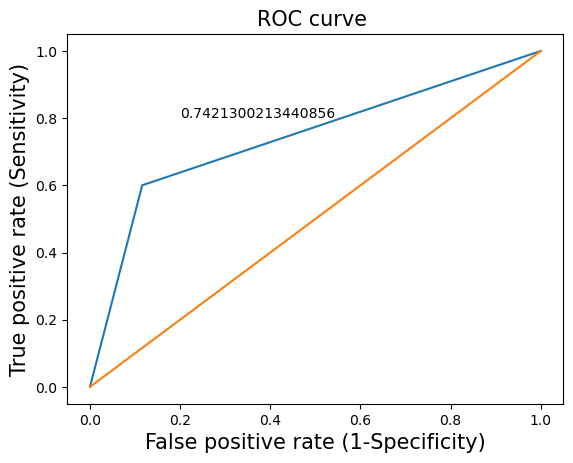

In [157]:
fpr,tpr,threshold=roc_curve(y_test,ypred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,ypred))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

Model is: DecisionTreeClassifier()
accuracy_score: 0.857801751094434
Recall Score 0.4099326599326599
F1 Score 0.34872896527031866
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11604
           1       0.30      0.41      0.35      1188

    accuracy                           0.86     12792
   macro avg       0.62      0.66      0.63     12792
weighted avg       0.88      0.86      0.87     12792



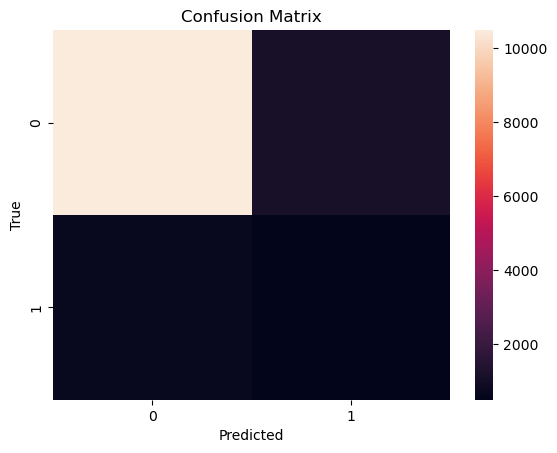

--------------------------------------------------------------------------
Model is: RandomForestClassifier()
accuracy_score: 0.8940744215134458
Recall Score 0.4048821548821549
F1 Score 0.4151920586965904
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11604
           1       0.43      0.40      0.42      1188

    accuracy                           0.89     12792
   macro avg       0.68      0.67      0.68     12792
weighted avg       0.89      0.89      0.89     12792



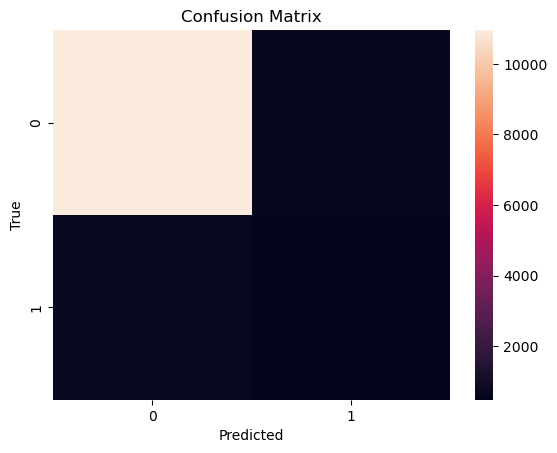

--------------------------------------------------------------------------
Model is: GradientBoostingClassifier()
accuracy_score: 0.9023608505315822
Recall Score 0.4713804713804714
F1 Score 0.47277332207682565
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11604
           1       0.47      0.47      0.47      1188

    accuracy                           0.90     12792
   macro avg       0.71      0.71      0.71     12792
weighted avg       0.90      0.90      0.90     12792



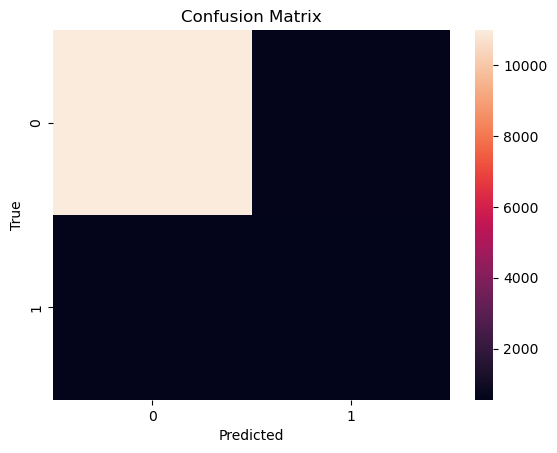

--------------------------------------------------------------------------
Model is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
accuracy_score: 0.9083020637898687
Recall Score 0.30723905723905726
F1 Score 0.3836048344718865
              precision    recall  f1-score   support

           0       0.93

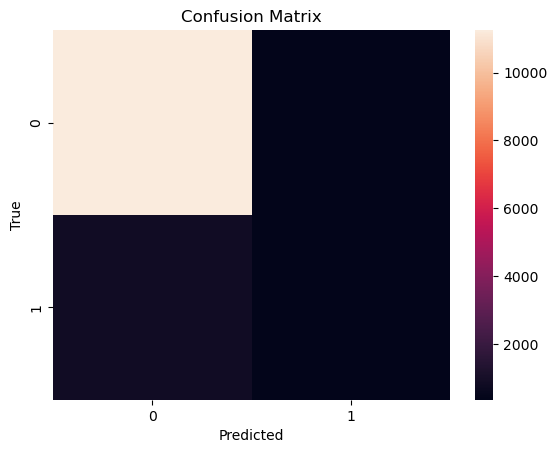

--------------------------------------------------------------------------


In [159]:
from sklearn.metrics import r2_score,recall_score,f1_score
import xgboost as xgb
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBClassifier()


Models = [tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(xtrain,ytrain_sm)
    #y_pred = model.predict(X_test)
    #y_pred_sm=model.predict(xtest)
    ypred=model.predict(xtest)
   # print(clf._class.name_)
    from sklearn.metrics import accuracy_score
    #y_pred_sm = model.predict(xtest)
    print('accuracy_score:', accuracy_score(y_test,ypred))
    #print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test,ypred))
    print('F1 Score', f1_score(y_test,ypred))
    print(classification_report(y_test,ypred))
    sns.heatmap(confusion_matrix(y_test,ypred))
    , annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print('--------------------------------------------------------------------------')

In [160]:
# XG Boost have more accuracy than other Models with 91 .

Model is: DecisionTreeClassifier()
accuracy_score: 0.858036272670419
Recall Score 0.40404040404040403
F1 Score 0.345821325648415


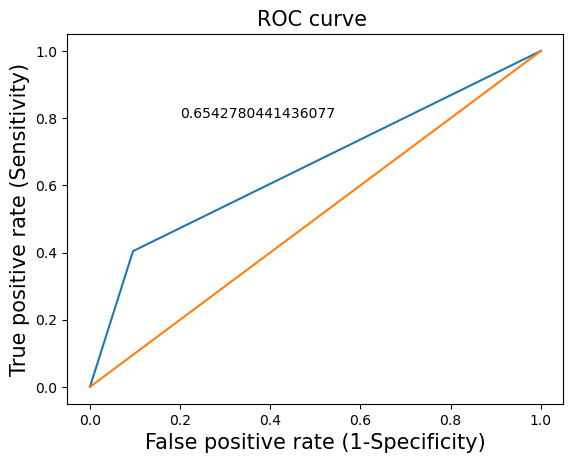

--------------------------------------------------------------------------
Model is: RandomForestClassifier()
accuracy_score: 0.8965759849906192
Recall Score 0.41835016835016836
F1 Score 0.42900302114803623


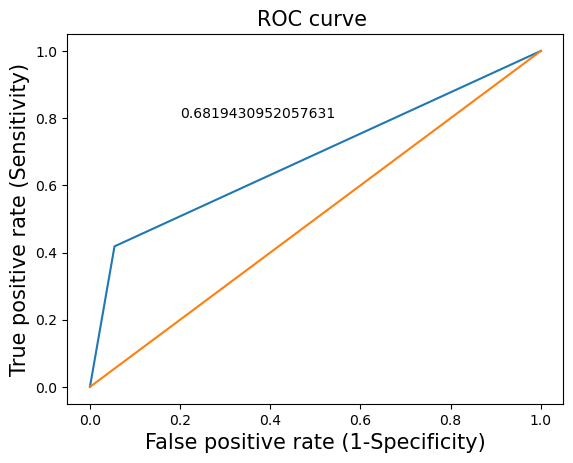

--------------------------------------------------------------------------
Model is: GradientBoostingClassifier()
accuracy_score: 0.9023608505315822
Recall Score 0.4713804713804714
F1 Score 0.47277332207682565


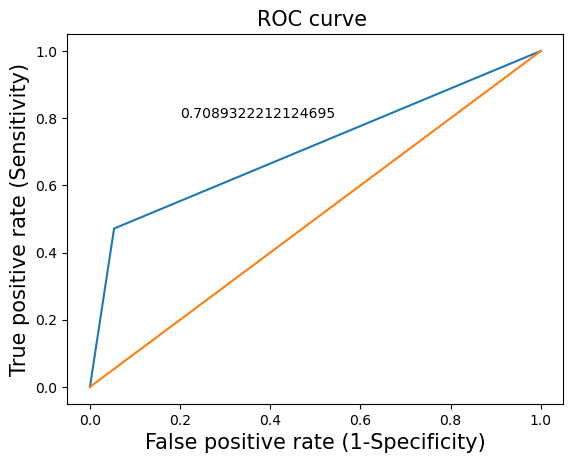

--------------------------------------------------------------------------
Model is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
accuracy_score: 0.9083020637898687
Recall Score 0.30723905723905726
F1 Score 0.3836048344718865


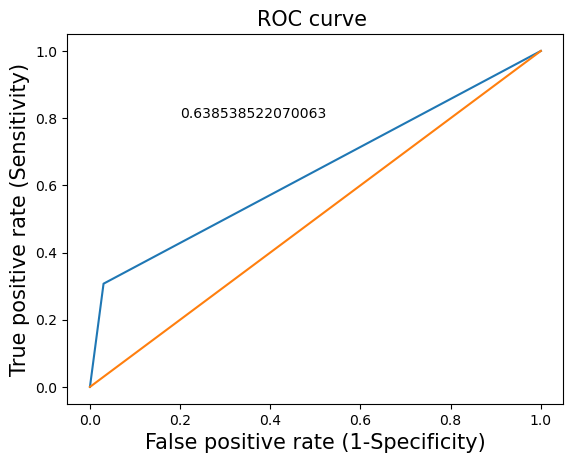

--------------------------------------------------------------------------


In [164]:
from sklearn.metrics import r2_score,recall_score,f1_score
import xgboost as xgb
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBClassifier()


Models = [tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(xtrain,ytrain_sm)
    #y_pred = model.predict(X_test)
    #y_pred_sm=model.predict(xtest)
    ypred=model.predict(xtest)
   # print(clf._class.name_)
    from sklearn.metrics import accuracy_score
    y_pred_sm = model.predict(xtest)
    print('accuracy_score:', accuracy_score(y_test,ypred))
    #print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test,ypred))
    print('F1 Score', f1_score(y_test,ypred))
    fpr,tpr,threshold=roc_curve(y_test,ypred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.text(0.2,0.8,roc_auc_score(y_test,ypred))
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.show()
    print('--------------------------------------------------------------------------')

In [166]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
decision_tree=DecisionTreeClassifier(random_state=10)

In [170]:
dt_grid = GridSearchCV(estimator = decision_tree,
                       param_grid = tuned_paramaters,
                       cv = 5)
dt_grid_model=dt_grid.fit(xtrain,ytrain_sm)
dt_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [174]:
dt_model = DecisionTreeClassifier(criterion = dt_grid_model.best_params_.get('criterion'),
                                  max_depth = dt_grid_model.best_params_.get('max_depth'),
                                  max_features = dt_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = dt_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = dt_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = dt_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

In [176]:
dt_model = dt_model.fit(xtrain,ytrain_sm)
dt_predict=dt_model.predict(xtest)

In [178]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11604
           1       0.26      0.42      0.32      1188

    accuracy                           0.84     12792
   macro avg       0.60      0.65      0.61     12792
weighted avg       0.87      0.84      0.85     12792



In [ ]:
#Precision for class 0
# out of total predicted negatives 94 percent are correct
# class 1
# out of total predicted positives 26 percent are correct
# Recall of class 0
# out of total actual negatives 88 percent are correctly predicted
# recall for class 1
# out of total actual positives 42 percent are correctly predicted.
# Accuracy Score increased to 84 with doing Feature Selection.

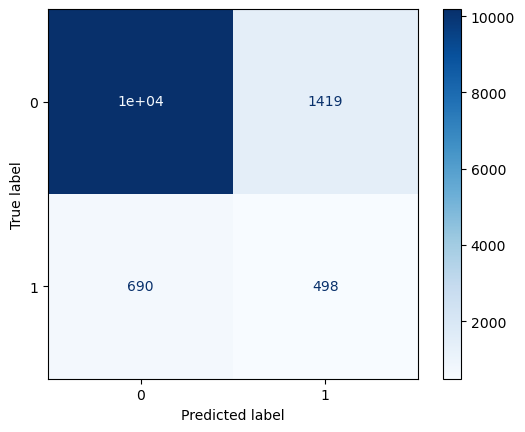

In [180]:
print(ConfusionMatrixDisplay.from_predictions(y_test,dt_predict,cmap='Blues'))
plt.show()

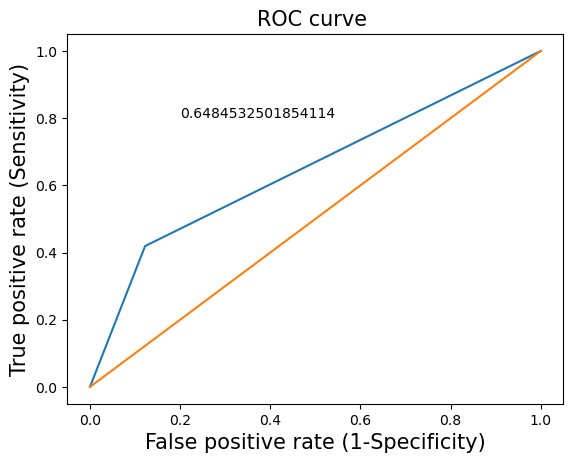

In [182]:
fpr,tpr,threshold=roc_curve(y_test,dt_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,dt_predict))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.show()

### RandomForest

In [184]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],}]
random_forest_classification = RandomForestClassifier(random_state = 10)
grid = GridSearchCV(estimator = random_forest_classification,
                       param_grid = tuned_paramaters,
                       cv = 5)
grid_model = grid.fit(xtrain,ytrain_sm)
print(grid_model.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [206]:
random_model = RandomForestClassifier(criterion = grid_model.best_params_.get('criterion'),
                                  max_depth = grid_model.best_params_.get('max_depth'),
                                  n_estimators = grid_model.best_params_.get('n_estimators'),
                                  min_samples_split = grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

In [208]:
randomforest_model = random_model.fit(xtrain,ytrain_sm)
randomforest_predict=randomforest_model.predict(xtest)

In [210]:
print(classification_report(y_test,randomforest_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11604
           1       0.44      0.42      0.43      1188

    accuracy                           0.90     12792
   macro avg       0.69      0.68      0.68     12792
weighted avg       0.89      0.90      0.89     12792



In [ ]:
#Precision for class 0
# out of total predicted negatives 94 percent are correct
# class 1
# out of total predicted positives 44 percent are correct
# Recall of class 0
# out of total actual negatives 94 percent are correctly predicted
# recall for class 1
# out of total actual positives 42 percent are correctly predicted.
# Accuracy Score increased to 84 with doing Feature Selection.

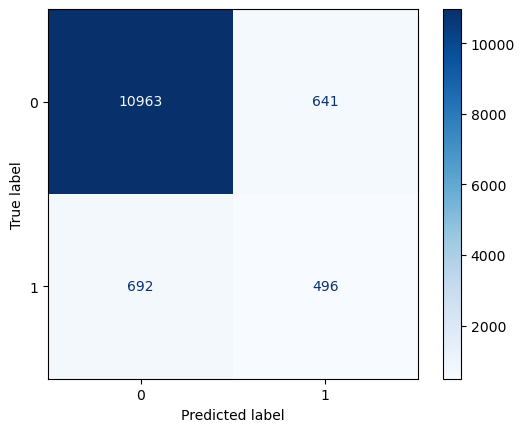

In [248]:
print(ConfusionMatrixDisplay.from_predictions(y_test,randomforest_predict,cmap='Blues'))
plt.show()

In [ ]:
# Accuracy score increases after HyperParameter tuning to 90 percent from 89 percent. 

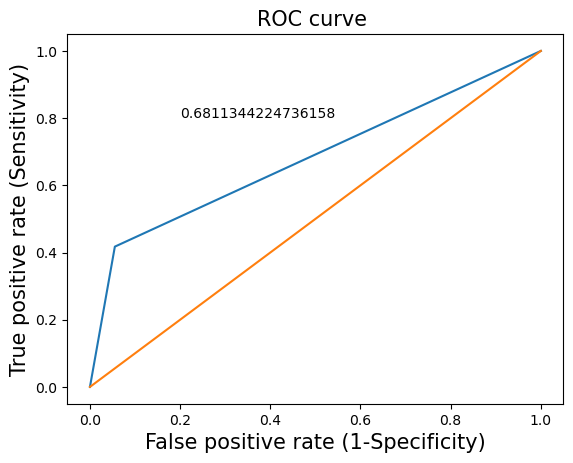

In [212]:
fpr,tpr,threshold=roc_curve(y_test,randomforest_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,randomforest_predict))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.show()

In [ ]:
#roc increased form 64 in Decision tree to 68

In [214]:
true_parameters=[{'n_estimators': [100, 120],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015],
    'max_depth' : [2, 3, 4, 5, 6]}]
gbm=GradientBoostingClassifier(random_state=10)
gbm_grid=GridSearchCV(estimator=gbm,param_grid=true_parameters,cv=5)
gbm_grid.fit(xtrain,ytrain_sm)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120]}])

In [216]:
gradient_model=GradientBoostingClassifier(n_estimators = gbm_grid.best_params_.get('n_estimators'),
                                          learning_rate = gbm_grid.best_params_.get('learning_rate'),
                                          max_depth = gbm_grid.best_params_.get('max_depth'),
                                         random_state=10)


In [218]:
gb_model=gradient_model.fit(xtrain,ytrain_sm)
gb_predict=gb_model.predict(xtest)

In [220]:
print(classification_report(y_test,gb_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11604
           1       0.50      0.35      0.41      1188

    accuracy                           0.91     12792
   macro avg       0.72      0.66      0.68     12792
weighted avg       0.89      0.91      0.90     12792



In [222]:
# The Accuracy score Increased compared to decision Tree
# The accuracy score increased to 91 from 90 ( before parameter Tuning)
#Precision for class 0
# out of total predicted negatives 94 percent are correct
# class 1
# out of total predicted positives 50 percent are correct
# Recall of class 0
# out of total actual negatives 97 percent are correctly predicted
# recall for class 1
# out of total actual positives 35 percent are correctly predicted.
# Accuracy Score increased to 91 with doing Feature Selection.

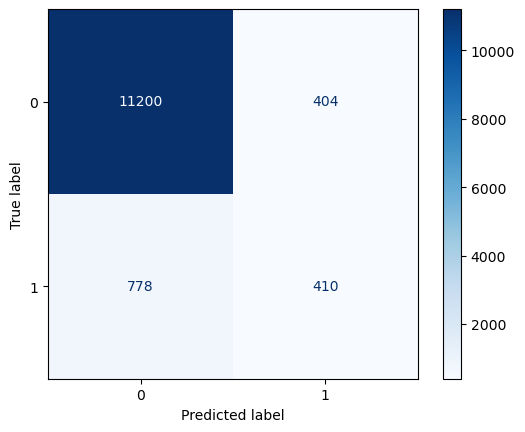

In [250]:
print(ConfusionMatrixDisplay.from_predictions(y_test,gb_predict,cmap='Blues'))
plt.show()

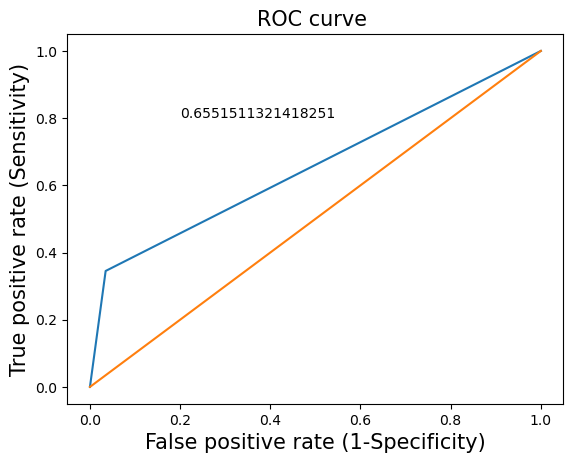

In [227]:
fpr,tpr,threshold=roc_curve(y_test,gb_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,gb_predict))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.show()

In [ ]:
# The ROC curve decreased to 65 compared to decision tree roc curve which is 68

In [230]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

In [236]:
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(xtrain,ytrain_sm)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0, 1, 2, 3, 4],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(3, 10)},
             scoring='roc_auc')

In [240]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'),
                              random_state=10)
xgb_model = xgb_grid_model.fit(xtrain,ytrain_sm)

In [242]:
xgb_predict=xgb_model.predict(xtest)

In [244]:
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11604
           1       0.50      0.31      0.38      1188

    accuracy                           0.91     12792
   macro avg       0.72      0.64      0.67     12792
weighted avg       0.89      0.91      0.90     12792



In [ ]:
#Precision for class 0
# out of total predicted negatives 93 percent are correct
# class 1
# out of total predicted positives 50 percent are correct
# Recall of class 0
# out of total actual negatives 97 percent are correctly predicted
# recall for class 1
# out of total actual positives 31 percent are correctly predicted.
# Accuracy Score increased to 91 with doing Feature Selection.

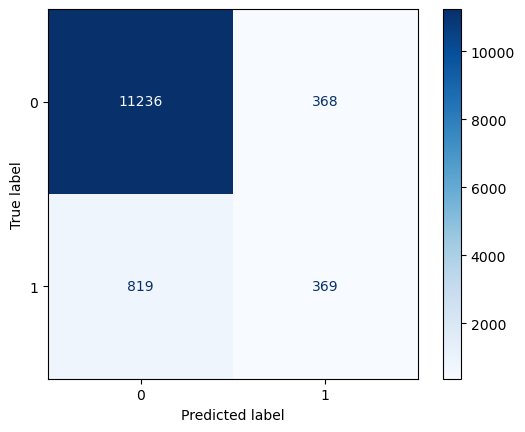

In [252]:
print(ConfusionMatrixDisplay.from_predictions(y_test,xgb_predict,cmap='Blues'))
plt.show()

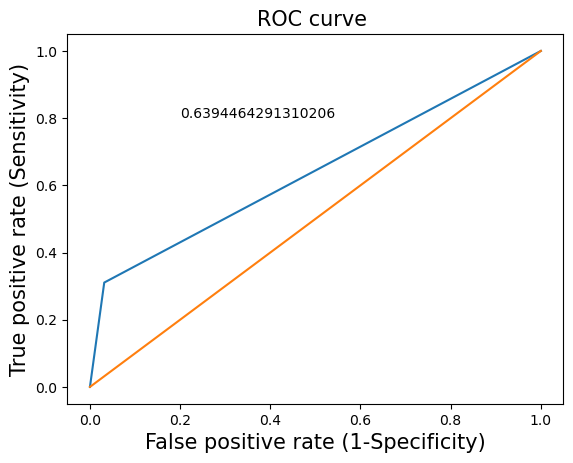

In [246]:
fpr,tpr,threshold=roc_curve(y_test,xgb_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.text(0.2,0.8,roc_auc_score(y_test,xgb_predict))
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.show()

In [ ]:
# The ROC curve has less  TP compared to gradient,randomforest and decision tree.
# The Accuracy remains at 91

In [ ]:
# The Metric we are considering is Recall  class 1 that is false negative should be less.bcz bank should not loose the potential customers.
# false Negative is less in the

In [ ]:
# The Logistic model built on the selected Features has given good results compared to the other models.
